In [1]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

import jieba,os,re
from gensim import corpora, models, similarities
import pandas as pd

In [3]:
input_df=pd.read_csv('Student Engagement Level Prediction - Multiclass Case/Student Engagement Level-Multiclass.csv')

In [4]:
input_df

Student ID  # Logins  # Content Reads  # Forum Reads  # Forum Posts  \
0    student000000       143              344             58              0   
1    student000001        70              342              0              0   
2    student000002        42              219              0              0   
3    student000003        92              271              2              0   
4    student000004       116              379              0              0   
..             ...       ...              ...            ...            ...   
481  student000481        98              281              0              0   
482  student000482        85              258              1              0   
483  student000483        99              206              0              0   
484  student000484        51              158              0              0   
485  student000485        89              289              0              0   

     # Quiz Reviews before submission  Assignment 1 lateness indicator  \
0                                   3                                0   
1                                   4                                0   
2                                   3                                0   
3                                   6                                0   
4                                   1                                0   
..                                ...                              ...   
481                                 1                                0   
482                                 2                                0   
483                                 6                                0   
484                                 2                                0   
485                                 0                                0   

     Assignment 2 lateness indicator  Assignment 3 lateness indicator  \
0                                  0                                0   
1                                  0                                0   
2                                  0                                0   
3                                  0                                0   
4                                  0                                0   
..                               ...                              ...   
481                                0                                0   
482                                0                                0   
483                                0                                0   
484                                0                                0   
485                                0                                0   

     Assignment 1 duration to submit (in hours)  \
0                                    178.166667   
1                                    294.033333   
2                                    169.600000   
3                                    341.150000   
4                                    325.500000   
..                                          ...   
481                                  175.200000   
482                                  127.633333   
483                                  177.850000   
484                                  125.900000   
485                                  313.183333   

     Assignment 2 duration to submit (in hours)  \
0                                     92.716667   
1                                    196.083333   
2                                    235.733333   
3                                    245.900000   
4                                    236.283333   
..                                          ...   
481                                   89.966667   
482                                   58.783333   
483                                  185.400000   
484                                   32.450000   
485                                  214.766667   

     Assignment 3 duration to submit (in hours)  \
0               

In [10]:
input_df['Engagement Level'].unique()

array(['H', 'M', 'L'], dtype=object)

In [12]:
input_df['Engagement Level'].tolist()

['H',
 'M',
 'M',
 'M',
 'M',
 'H',
 'M',
 'H',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'M',
 'L',
 'H',
 'H',
 'H',
 'M',
 'M',
 'H',
 'H',
 'M',
 'H',
 'M',
 'M',
 'H',
 'M',
 'M',
 'M',
 'M',
 'M',
 'H',
 'H',
 'L',
 'H',
 'H',
 'M',
 'H',
 'M',
 'M',
 'M',
 'H',
 'M',
 'M',
 'M',
 'M',
 'H',
 'M',
 'H',
 'H',
 'H',
 'M',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'M',
 'H',
 'H',
 'M',
 'H',
 'H',
 'H',
 'H',
 'M',
 'M',
 'H',
 'H',
 'H',
 'M',
 'M',
 'L',
 'M',
 'H',
 'M',
 'H',
 'H',
 'H',
 'M',
 'L',
 'H',
 'M',
 'H',
 'H',
 'H',
 'H',
 'M',
 'M',
 'M',
 'H',
 'L',
 'H',
 'M',
 'M',
 'H',
 'M',
 'M',
 'M',
 'H',
 'H',
 'M',
 'H',
 'H',
 'L',
 'M',
 'M',
 'H',
 'H',
 'M',
 'H',
 'H',
 'H',
 'H',
 'M',
 'H',
 'H',
 'H',
 'H',
 'M',
 'M',
 'M',
 'M',
 'H',
 'H',
 'H',
 'H',
 'M',
 'M',
 'M',
 'H',
 'M',
 'H',
 'M',
 'M',
 'M',
 'M',
 'H',
 'H',
 'M',
 'H',
 'L',
 'H',
 'M',
 'M',
 'H',
 'H',
 'M',
 'H',
 'M',
 'M',
 'M',
 'H',
 'M',
 'M',
 'H',
 'H',
 'M'

In [503]:
input_p_df=pd.read_csv('Student Performance Prediction - Multiclass Case/Student Performance Prediction-Multi.csv')

In [504]:
input_p_df

Student ID  Quiz01 [10]  Assignment01 [8]  Midterm Exam [20]  \
0    student000000           95                91                 70   
1    student000001           85                76                 65   
2    student000002           85                41                 73   
3    student000003           80                78                 80   
4    student000004           85                91                 78   
..             ...          ...               ...                ...   
481  student000481           90                85                 93   
482  student000482           80                68                 93   
483  student000483           80                86                 93   
484  student000484           75                68                 80   
485  student000485           85                81                 88   

     Assignment02 [12]  Assignment03 [25]  Final Exam [35]  Course Grade  \
0                   90                 84               64            85   
1                   61                 73               64            76   
2                   61                 73               61            73   
3                   79                 79               57            80   
4                   80                 84               67            85   
..                 ...                ...              ...           ...   
481                 87                 81               77            92   
482                 70                 83               83            90   
483                 95                 90               83            96   
484                 76                 88               50            78   
485                 86                 96               60            88   

     Total [100] Class  
0             85     G  
1             76     G  
2             73     G  
3             79     G  
4             85     G  
..           ...   ...  
481           92     G  
482           90     G  
483           96     G  
484           78     G  
485           88     G  

[486 rows x 10 columns]

In [505]:
input_p_df['Class'].value_counts()

G    419
F     59
W      8
Name: Class, dtype: int64

In [1136]:
input_p_df[ (input_p_df['Course Grade']>=90) &(input_p_df['Course Grade']>= 90)].value_counts()

Student ID     Quiz01 [10]  Assignment01 [8]  Midterm Exam [20]  Assignment02 [12]  Assignment03 [25]  Final Exam [35]  Course Grade  Total [100]  Class
student000010  90           93                88                 87                 90                 73               92            93           G        1
student000318  90           86                88                 96                 85                 77               93            93           G        1
student000361  85           85                88                 91                 95                 81               96            96           G        1
student000360  85           92                90                 91                 92                 90               99            99           G        1
student000359  70           90                90                 84                 87                 86               94            94           G        1
                                                         

In [506]:
419+59+8

486

In [507]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12
 
#plt.title('test title', fontsize=20)
#axes.titlesize

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.figure(figsize=(15,10))
ax = plt.hist(data = input_p_df, x='Course Grade', bins=20, range=[0, 100], facecolor='gray', align='mid')
plt.title("Course Grade")
#figure = ax.figure()
plt.savefig('course_hist.png')

In [465]:
merge_pd = pd.merge(input_df, input_p_df, on='Student ID')

In [517]:
merge_pd

Student ID  # Logins  # Content Reads  # Forum Reads  # Forum Posts  \
0    student000000       143              344             58              0   
1    student000001        70              342              0              0   
2    student000002        42              219              0              0   
3    student000003        92              271              2              0   
4    student000004       116              379              0              0   
..             ...       ...              ...            ...            ...   
481  student000481        98              281              0              0   
482  student000482        85              258              1              0   
483  student000483        99              206              0              0   
484  student000484        51              158              0              0   
485  student000485        89              289              0              0   

     # Quiz Reviews before submission  Assignment 1 lateness indicator  \
0                                   3                                0   
1                                   4                                0   
2                                   3                                0   
3                                   6                                0   
4                                   1                                0   
..                                ...                              ...   
481                                 1                                0   
482                                 2                                0   
483                                 6                                0   
484                                 2                                0   
485                                 0                                0   

     Assignment 2 lateness indicator  Assignment 3 lateness indicator  \
0                                  0                                0   
1                                  0                                0   
2                                  0                                0   
3                                  0                                0   
4                                  0                                0   
..                               ...                              ...   
481                                0                                0   
482                                0                                0   
483                                0                                0   
484                                0                                0   
485                                0                                0   

     Assignment 1 duration to submit (in hours)  ...  Engagement Level  \
0                                    178.166667  ...                 H   
1                                    294.033333  ...                 M   
2                                    169.600000  ...                 M   
3                                    341.150000  ...                 M   
4                                    325.500000  ...                 M   
..                                          ...  ...               ...   
481                                  175.200000  ...                 H   
482                                  127.633333  ...                 H   
483                                  177.850000  ...                 M   
484                                  125.900000  ...                 H   
485                                  313.183333  ...                 M   

     Quiz01 [10]  Assignment01 [8] Midterm Exam [20]  Assignment02 [12]  \
0             95                91                70                 90   
1             85                76                65                 61   
2             85                41                73                 61   
3             80                78                80                 79   
4             85             

In [518]:
merge_pd['ass1_rate'] = merge_pd['Assignment01 [8]'] / merge_pd['Assignment 1 duration to submit (in hours)']

In [519]:
merge_pd['ass2_rate'] =  merge_pd['Assignment02 [12]'] / merge_pd['Assignment 2 duration to submit (in hours)']

In [520]:
merge_pd['ass3_rate'] =  merge_pd['Assignment03 [25]'] / merge_pd['Assignment 3 duration to submit (in hours)']

In [562]:
merge_pd['ass1_time_minmax_norm'] = (merge_pd['Assignment 1 duration to submit (in hours)']-merge_pd['Assignment 1 duration to submit (in hours)'].min())/(merge_pd['Assignment 1 duration to submit (in hours)'].max()-merge_pd['Assignment 1 duration to submit (in hours)'].min())

In [563]:
merge_pd['ass1_score_minmax_norm'] = (merge_pd['Assignment01 [8]']-merge_pd['Assignment01 [8]'].min())/(merge_pd['Assignment01 [8]'].max()-merge_pd['Assignment01 [8]'].min())

In [564]:
merge_pd['ass1_rate_minmax_norm'] = merge_pd['ass1_score_minmax_norm'] / merge_pd['ass1_time_minmax_norm']

In [565]:
merge_pd

Student ID  # Logins  # Content Reads  # Forum Reads  # Forum Posts  \
0    student000000       143              344             58              0   
1    student000001        70              342              0              0   
2    student000002        42              219              0              0   
3    student000003        92              271              2              0   
4    student000004       116              379              0              0   
..             ...       ...              ...            ...            ...   
481  student000481        98              281              0              0   
482  student000482        85              258              1              0   
483  student000483        99              206              0              0   
484  student000484        51              158              0              0   
485  student000485        89              289              0              0   

     # Quiz Reviews before submission  Assignment 1 lateness indicator  \
0                                   3                                0   
1                                   4                                0   
2                                   3                                0   
3                                   6                                0   
4                                   1                                0   
..                                ...                              ...   
481                                 1                                0   
482                                 2                                0   
483                                 6                                0   
484                                 2                                0   
485                                 0                                0   

     Assignment 2 lateness indicator  Assignment 3 lateness indicator  \
0                                  0                                0   
1                                  0                                0   
2                                  0                                0   
3                                  0                                0   
4                                  0                                0   
..                               ...                              ...   
481                                0                                0   
482                                0                                0   
483                                0                                0   
484                                0                                0   
485                                0                                0   

     Assignment 1 duration to submit (in hours)  ...  Class  ass1_rate  \
0                                    178.166667  ...      G   0.510758   
1                                    294.033333  ...      G   0.258474   
2                                    169.600000  ...      G   0.241745   
3                                    341.150000  ...      G   0.228638   
4                                    325.500000  ...      G   0.279570   
..                                          ...  ...    ...        ...   
481                                  175.200000  ...      G   0.485160   
482                                  127.633333  ...      G   0.532776   
483                                  177.850000  ...      G   0.483554   
484                                  125.900000  ...      G   0.540111   
485                                  313.183333  ...      G   0.258634   

     ass2_rate ass3_rate  ass1_time_minmax_norm  ass1_score_minmax_norm  \
0     0.970699  0.723099               0.250994                0.919192   
1     0.311092  0.335247               0.479475                0.767677   
2     0.258767  0.280410               0.234101                0.414141   
3     0.321269  0.291280               0.572386                0.787879   
4     0.338577  0.322168     

In [566]:
#ML predict score interval

In [567]:
merge_pd['below 60'] = 0
merge_pd.loc[merge_pd['Course Grade']<60, 'below 60'] = 1

In [568]:
merge_pd['below 70'] = 0
merge_pd.loc[merge_pd['Course Grade']<70, 'below 70'] = 1

In [569]:
merge_pd['below 80'] = 0
merge_pd.loc[merge_pd['Course Grade']<80, 'below 80'] = 1

In [570]:
merge_pd

Student ID  # Logins  # Content Reads  # Forum Reads  # Forum Posts  \
0    student000000       143              344             58              0   
1    student000001        70              342              0              0   
2    student000002        42              219              0              0   
3    student000003        92              271              2              0   
4    student000004       116              379              0              0   
..             ...       ...              ...            ...            ...   
481  student000481        98              281              0              0   
482  student000482        85              258              1              0   
483  student000483        99              206              0              0   
484  student000484        51              158              0              0   
485  student000485        89              289              0              0   

     # Quiz Reviews before submission  Assignment 1 lateness indicator  \
0                                   3                                0   
1                                   4                                0   
2                                   3                                0   
3                                   6                                0   
4                                   1                                0   
..                                ...                              ...   
481                                 1                                0   
482                                 2                                0   
483                                 6                                0   
484                                 2                                0   
485                                 0                                0   

     Assignment 2 lateness indicator  Assignment 3 lateness indicator  \
0                                  0                                0   
1                                  0                                0   
2                                  0                                0   
3                                  0                                0   
4                                  0                                0   
..                               ...                              ...   
481                                0                                0   
482                                0                                0   
483                                0                                0   
484                                0                                0   
485                                0                                0   

     Assignment 1 duration to submit (in hours)  ...  Class  ass1_rate  \
0                                    178.166667  ...      G   0.510758   
1                                    294.033333  ...      G   0.258474   
2                                    169.600000  ...      G   0.241745   
3                                    341.150000  ...      G   0.228638   
4                                    325.500000  ...      G   0.279570   
..                                          ...  ...    ...        ...   
481                                  175.200000  ...      G   0.485160   
482                                  127.633333  ...      G   0.532776   
483                                  177.850000  ...      G   0.483554   
484                                  125.900000  ...      G   0.540111   
485                                  313.183333  ...      G   0.258634   

     ass2_rate ass3_rate  ass1_time_minmax_norm  ass1_score_minmax_norm  \
0     0.970699  0.723099               0.250994                0.919192   
1     0.311092  0.335247               0.479475                0.767677   
2     0.258767  0.280410               0.234101                0.414141   
3     0.321269  0.291280               0.572386                0.787879   
4     0.338577  0.322168     

In [571]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import svm
max_abs_scaler = preprocessing.MaxAbsScaler()

In [829]:
Model_Result = {}

In [830]:
#ASSIGNMENT 1 only


X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)']])
X = max_abs_scaler.fit_transform(X)
Y = np.array(merge_pd['below 70'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
model = LogisticRegression(random_state=0)

model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass1_N_blow70_LR_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.8600823045267489
Precision: 0.7465425531914893
Recall: 0.5621980676328503
F1: 0.5751748251748252
#################### 



In [831]:
X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)', 'ass1_rate']])
Y = np.array(merge_pd['below 70'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
model = LogisticRegression(random_state=0)

model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass1_Y_blow70_LR_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.8724279835390947
Precision: 0.702914798206278
Recall: 0.6377054169202678
F1: 0.6604462474645031
#################### 



In [832]:
X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)']])
X = max_abs_scaler.fit_transform(X)
Y = np.array(merge_pd['below 70'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
model = svm.SVC(kernel='rbf',decision_function_shape='ovo')
#model = svm.SVC(kernel='linear')
#model = svm.SVC(kernel='linear',decision_function_shape='ovo')
#model = svm.SVC(kernel='rbf',decision_function_shape='ovo')
#model = svm.SVC(kernel='poly')
#model = svm.SVC(kernel='poly',decision_function_shape='ovo')
#model = svm.SVC(kernel='sigmoid')
#model = svm.SVC(kernel='sigmoid',decision_function_shape='ovo')

model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass1_N_blow70_SVM_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.8724279835390947
Precision: 0.6893305439330544
Recall: 0.5275410833840536
F1: 0.5227747861894204
#################### 



In [833]:
X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)', 'ass1_rate']])
X = max_abs_scaler.fit_transform(X)
Y = np.array(merge_pd['below 70'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
model = svm.SVC(kernel='rbf',decision_function_shape='ovo')
#model = svm.SVC(kernel='linear')
#model = svm.SVC(kernel='linear',decision_function_shape='ovo')
#model = svm.SVC(kernel='rbf',decision_function_shape='ovo')
#model = svm.SVC(kernel='poly')
#model = svm.SVC(kernel='poly',decision_function_shape='ovo')
#model = svm.SVC(kernel='sigmoid')
#model = svm.SVC(kernel='sigmoid',decision_function_shape='ovo')

model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass1_Y_blow70_SVM_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.8559670781893004
Precision: 0.8449367088607596
Recall: 0.5616515837104072
F1: 0.5714285714285714
#################### 



In [834]:
X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)']])
X = max_abs_scaler.fit_transform(X)
Y = np.array(merge_pd['below 80'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
model = LogisticRegression(random_state=0)

model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass1_N_blow80_LR_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.7448559670781894
Precision: 0.7301587301587302
Recall: 0.6758760107816711
F1: 0.6862818590704648
#################### 



In [835]:
X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)', 'ass1_rate']])
Y = np.array(merge_pd['below 80'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
model = LogisticRegression(random_state=0)

model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass1_Y_blow80_LR_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.7407407407407407
Precision: 0.696395492435937
Recall: 0.7034623380777227
F1: 0.699523052464229
#################### 



In [1018]:
X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)']])
X = max_abs_scaler.fit_transform(X)
Y = np.array(merge_pd['below 80'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
#model = svm.SVC(kernel='rbf',decision_function_shape='ovo')
#model = svm.SVC(kernel='linear')
#model = svm.SVC(kernel='linear',decision_function_shape='ovo')
#model = svm.SVC(kernel='rbf',decision_function_shape='ovo')
#model = svm.SVC(kernel='poly')
model = svm.SVC(kernel='poly',decision_function_shape='ovo')
#model = svm.SVC(kernel='sigmoid')
#model = svm.SVC(kernel='sigmoid',decision_function_shape='ovo')

model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass1_N_blow80_SVM_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.7325102880658436
Precision: 0.7439890710382514
Recall: 0.6891681965824036
F1: 0.6942094360443731
#################### 



In [1007]:
X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)', 'ass1_rate']])
X = max_abs_scaler.fit_transform(X)
Y = np.array(merge_pd['below 80'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
model = svm.SVC(kernel='rbf',decision_function_shape='ovo')
#model = svm.SVC(kernel='linear')
#model = svm.SVC(kernel='linear',decision_function_shape='ovo')
#model = svm.SVC(kernel='rbf',decision_function_shape='ovo')
#model = svm.SVC(kernel='poly')
model = svm.SVC(kernel='poly',decision_function_shape='ovo')
#model = svm.SVC(kernel='sigmoid')
#model = svm.SVC(kernel='sigmoid',decision_function_shape='ovo')

model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass1_Y_blow80_SVM_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.7654320987654321
Precision: 0.7369648940897645
Recall: 0.7438271604938271
F1: 0.7399996245753009
#################### 



In [838]:
# ASSIGNMENT 1 & 2

In [927]:
# ASSIGNMENT 1 & 2
X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)', 'Assignment02 [12]', 'Assignment 2 duration to submit (in hours)']])
X = max_abs_scaler.fit_transform(X)
Y = np.array(merge_pd['below 70'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
model = LogisticRegression(random_state=0)

model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass12_N_blow70_LR_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.8724279835390947
Precision: 0.8132978723404256
Recall: 0.5809065934065935
F1: 0.6045461704026458
#################### 



In [931]:
X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)', 'ass1_rate','Assignment02 [12]', 'Assignment 2 duration to submit (in hours)', 'ass2_rate']])
X = max_abs_scaler.fit_transform(X)
Y = np.array(merge_pd['below 70'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
model = LogisticRegression(random_state=0)

model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass12_Y_blow70_LR_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.8847736625514403
Precision: 0.844206008583691
Recall: 0.6128623698283141
F1: 0.6501439736733854
#################### 



In [1019]:
# ASSIGNMENT 1 & 2
X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)', 'Assignment02 [12]', 'Assignment 2 duration to submit (in hours)']])
X = max_abs_scaler.fit_transform(X)
Y = np.array(merge_pd['below 80'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
model = LogisticRegression(random_state=0)

model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass12_N_blow80_LR_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.7489711934156379
Precision: 0.7895320197044335
Recall: 0.6715307164745367
F1: 0.6781317178034003
#################### 



In [1021]:
X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)', 'ass1_rate','Assignment02 [12]', 'Assignment 2 duration to submit (in hours)', 'ass2_rate']])
X = max_abs_scaler.fit_transform(X)
Y = np.array(merge_pd['below 80'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
model = LogisticRegression(random_state=0)

model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass12_Y_blow80_LR_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.7695473251028807
Precision: 0.7870292446875657
Recall: 0.7010389036251106
F1: 0.7141176470588235
#################### 



In [843]:
# ASSIGNMENT 1 & 2
X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)', 'Assignment02 [12]', 'Assignment 2 duration to submit (in hours)']])
X = max_abs_scaler.fit_transform(X)
Y = np.array(merge_pd['below 70'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
model = svm.SVC(kernel='rbf',decision_function_shape='ovo')
#model = svm.SVC(kernel='linear')
#model = svm.SVC(kernel='linear',decision_function_shape='ovo')
#model = svm.SVC(kernel='rbf',decision_function_shape='ovo')
#model = svm.SVC(kernel='poly')
#model = svm.SVC(kernel='poly',decision_function_shape='ovo')
#model = svm.SVC(kernel='sigmoid')
#model = svm.SVC(kernel='sigmoid',decision_function_shape='ovo')


model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass12_N_blow70_SVM_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.8930041152263375
Precision: 0.9453781512605042
Recall: 0.5806451612903226
F1: 0.61
#################### 



In [844]:
# ASSIGNMENT 1 & 2
X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)', 'ass1_rate','Assignment02 [12]', 'Assignment 2 duration to submit (in hours)', 'ass2_rate']])
X = max_abs_scaler.fit_transform(X)
Y = np.array(merge_pd['below 70'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
model = svm.SVC(kernel='rbf',decision_function_shape='ovo')
#model = svm.SVC(kernel='linear')
#model = svm.SVC(kernel='linear',decision_function_shape='ovo')
#model = svm.SVC(kernel='rbf',decision_function_shape='ovo')
#model = svm.SVC(kernel='poly')
#model = svm.SVC(kernel='poly',decision_function_shape='ovo')
#model = svm.SVC(kernel='sigmoid')
#model = svm.SVC(kernel='sigmoid',decision_function_shape='ovo')


model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass12_Y_blow70_SVM_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.8888888888888888
Precision: 0.8119122257053292
Recall: 0.6178909952606635
F1: 0.6555724709958528
#################### 



In [969]:
# ASSIGNMENT 1 & 2 & 3
X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)', 'Assignment02 [12]', 'Assignment 2 duration to submit (in hours)', 'Assignment03 [25]', 'Assignment 3 duration to submit (in hours)']])
X = max_abs_scaler.fit_transform(X)
Y = np.array(merge_pd['below 70'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
model = svm.SVC(kernel='rbf',decision_function_shape='ovo')
#model = svm.SVC(kernel='linear')
#model = svm.SVC(kernel='linear',decision_function_shape='ovo')
#model = svm.SVC(kernel='rbf',decision_function_shape='ovo')
#model = svm.SVC(kernel='poly')
#model = svm.SVC(kernel='poly',decision_function_shape='ovo')
#model = svm.SVC(kernel='sigmoid')
#model = svm.SVC(kernel='sigmoid',decision_function_shape='ovo')


model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass123_N_blow70_SVM_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.9053497942386831
Precision: 0.768561872909699
Recall: 0.6423254165189649
F1: 0.6794011357769747
#################### 



In [972]:
# ASSIGNMENT 1 & 2 & 3
X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)', 'ass1_rate','Assignment02 [12]', 'Assignment 2 duration to submit (in hours)', 'ass2_rate', 'Assignment03 [25]', 'Assignment 3 duration to submit (in hours)', 'ass3_rate']])
X = max_abs_scaler.fit_transform(X)
Y = np.array(merge_pd['below 70'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
model = svm.SVC(kernel='rbf',decision_function_shape='ovo')
#model = svm.SVC(kernel='linear')
#model = svm.SVC(kernel='linear',decision_function_shape='ovo')
#model = svm.SVC(kernel='rbf',decision_function_shape='ovo')
#model = svm.SVC(kernel='poly')
#model = svm.SVC(kernel='poly',decision_function_shape='ovo')
#model = svm.SVC(kernel='sigmoid')
#model = svm.SVC(kernel='sigmoid',decision_function_shape='ovo')


model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass123_Y_blow70_SVM_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.9053497942386831
Precision: 0.95
Recall: 0.6805555555555556
F1: 0.7389903329752954
#################### 



In [1123]:
# ASSIGNMENT 1 & 2 
X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)', 'Assignment02 [12]', 'Assignment 2 duration to submit (in hours)']])
X = max_abs_scaler.fit_transform(X)
Y = np.array(merge_pd['below 80'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
model = svm.SVC(kernel='rbf',decision_function_shape='ovo')
#model = svm.SVC(kernel='linear')
#model = svm.SVC(kernel='linear',decision_function_shape='ovo')
#model = svm.SVC(kernel='rbf',decision_function_shape='ovo')
#model = svm.SVC(kernel='poly')
#model = svm.SVC(kernel='poly',decision_function_shape='ovo')
#model = svm.SVC(kernel='sigmoid')
#model = svm.SVC(kernel='sigmoid',decision_function_shape='ovo')


model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass12_N_blow80_SVM_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.7860082304526749
Precision: 0.79533275713051
Recall: 0.7449462365591398
F1: 0.7561747452917567
#################### 



In [1125]:
# ASSIGNMENT 1 & 2 & 3
X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)', 'ass1_rate','Assignment02 [12]', 'Assignment 2 duration to submit (in hours)', 'ass2_rate']])
X = max_abs_scaler.fit_transform(X)
Y = np.array(merge_pd['below 80'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
model = svm.SVC(kernel='rbf',decision_function_shape='ovo')
#model = svm.SVC(kernel='linear')
#model = svm.SVC(kernel='linear',decision_function_shape='ovo')
#model = svm.SVC(kernel='rbf',decision_function_shape='ovo')
#model = svm.SVC(kernel='poly')
#model = svm.SVC(kernel='poly',decision_function_shape='ovo')
#model = svm.SVC(kernel='sigmoid')
#model = svm.SVC(kernel='sigmoid',decision_function_shape='ovo')


model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass12_Y_blow80_SVM_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.7942386831275721
Precision: 0.7994752623688156
Recall: 0.757741935483871
F1: 0.7685185185185186
#################### 



In [1113]:
# ASSIGNMENT 1 & 2 & 3
X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)', 'Assignment02 [12]', 'Assignment 2 duration to submit (in hours)', 'Assignment03 [25]', 'Assignment 3 duration to submit (in hours)']])
X = max_abs_scaler.fit_transform(X)
Y = np.array(merge_pd['below 80'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
model = svm.SVC(kernel='rbf',decision_function_shape='ovo')
#model = svm.SVC(kernel='linear')
#model = svm.SVC(kernel='linear',decision_function_shape='ovo')
#model = svm.SVC(kernel='rbf',decision_function_shape='ovo')
#model = svm.SVC(kernel='poly')
#model = svm.SVC(kernel='poly',decision_function_shape='ovo')
#model = svm.SVC(kernel='sigmoid')
#model = svm.SVC(kernel='sigmoid',decision_function_shape='ovo')


model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass123_N_blow80_SVM_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.7942386831275721
Precision: 0.8204840103716509
Recall: 0.7601010101010102
F1: 0.7699212240569611
#################### 



In [1121]:
# ASSIGNMENT 1 & 2 & 3
X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)', 'ass1_rate','Assignment02 [12]', 'Assignment 2 duration to submit (in hours)', 'ass2_rate', 'Assignment03 [25]', 'Assignment 3 duration to submit (in hours)', 'ass3_rate']])
X = max_abs_scaler.fit_transform(X)
Y = np.array(merge_pd['below 80'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
model = svm.SVC(kernel='rbf',decision_function_shape='ovo')
#model = svm.SVC(kernel='linear')
#model = svm.SVC(kernel='linear',decision_function_shape='ovo')
#model = svm.SVC(kernel='rbf',decision_function_shape='ovo')
#model = svm.SVC(kernel='poly')
#model = svm.SVC(kernel='poly',decision_function_shape='ovo')
#model = svm.SVC(kernel='sigmoid')
#model = svm.SVC(kernel='sigmoid',decision_function_shape='ovo')


model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass123_Y_blow80_SVM_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.8106995884773662
Precision: 0.8249263019980346
Recall: 0.7801864143482559
F1: 0.7907681940700808
#################### 



In [959]:
# ASSIGNMENT 1 & 2 & 3
X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)', 'Assignment02 [12]', 'Assignment 2 duration to submit (in hours)', 'Assignment03 [25]', 'Assignment 3 duration to submit (in hours)']])
X = max_abs_scaler.fit_transform(X)
Y = np.array(merge_pd['below 70'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
model = LogisticRegression(random_state=0)

model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass123_N_blow70_LR_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.897119341563786
Precision: 0.9465811965811965
Recall: 0.6323529411764706
F1: 0.6810856212924563
#################### 



In [846]:
# ASSIGNMENT 1 & 2 & 3
X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)', 'ass1_rate','Assignment02 [12]', 'Assignment 2 duration to submit (in hours)', 'ass2_rate', 'Assignment03 [25]', 'Assignment 3 duration to submit (in hours)', 'ass3_rate']])
X = max_abs_scaler.fit_transform(X)
Y = np.array(merge_pd['below 70'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
model = LogisticRegression(random_state=0)

model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass123_Y_blow70_LR_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.9135802469135802
Precision: 0.844742321707444
Recall: 0.7072769953051643
F1: 0.7526777492366596
#################### 



In [847]:
# ASSIGNMENT 1 & 2 & 3
X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)', 'Assignment02 [12]', 'Assignment 2 duration to submit (in hours)', 'Assignment03 [25]', 'Assignment 3 duration to submit (in hours)']])
X = max_abs_scaler.fit_transform(X)
Y = np.array(merge_pd['below 80'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
model = LogisticRegression(random_state=0)

model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass123_N_blow80_LR_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.7860082304526749
Precision: 0.8428815948449456
Recall: 0.7396551724137931
F1: 0.7492857142857143
#################### 



In [848]:
# ASSIGNMENT 1 & 2 & 3
X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)', 'ass1_rate','Assignment02 [12]', 'Assignment 2 duration to submit (in hours)', 'ass2_rate', 'Assignment03 [25]', 'Assignment 3 duration to submit (in hours)', 'ass3_rate']])
X = max_abs_scaler.fit_transform(X)
Y = np.array(merge_pd['below 80'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
model = LogisticRegression(random_state=0)

model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass123_Y_blow80_LR_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.8065843621399177
Precision: 0.801238638388879
Recall: 0.7545557228915662
F1: 0.7690160784710285
#################### 



In [1096]:
Model_Result

{'ass1_N_blow70_LR_Accuracy': 0.8600823045267489,
 'ass1_N_blow70_LR_Precision': 0.7465425531914893,
 'ass1_N_blow70_LR_Recall': 0.5621980676328503,
 'ass1_N_blow70_LR_F1': 0.5751748251748252,
 'ass1_Y_blow70_LR_Accuracy': 0.8724279835390947,
 'ass1_Y_blow70_LR_Precision': 0.702914798206278,
 'ass1_Y_blow70_LR_Recall': 0.6377054169202678,
 'ass1_Y_blow70_LR_F1': 0.6604462474645031,
 'ass1_N_blow70_SVM_Accuracy': 0.8724279835390947,
 'ass1_N_blow70_SVM_Precision': 0.6893305439330544,
 'ass1_N_blow70_SVM_Recall': 0.5275410833840536,
 'ass1_N_blow70_SVM_F1': 0.5227747861894204,
 'ass1_Y_blow70_SVM_Accuracy': 0.8559670781893004,
 'ass1_Y_blow70_SVM_Precision': 0.8449367088607596,
 'ass1_Y_blow70_SVM_Recall': 0.5616515837104072,
 'ass1_Y_blow70_SVM_F1': 0.5714285714285714,
 'ass1_N_blow80_LR_Accuracy': 0.7448559670781894,
 'ass1_N_blow80_LR_Precision': 0.7301587301587302,
 'ass1_N_blow80_LR_Recall': 0.6758760107816711,
 'ass1_N_blow80_LR_F1': 0.6862818590704648,
 'ass1_Y_blow80_LR_Accuracy'

In [424]:
from sklearn.neural_network import MLPClassifier

In [871]:
#ASSIGNMENT 1 only


X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)']])
X = max_abs_scaler.fit_transform(X)
Y = np.array(merge_pd['below 70'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
model = MLPClassifier(tol=1e-3) # max_iter is set to 200 as default

model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass1_N_blow70_MLP_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.8641975308641975
Precision: 0.43209876543209874
Recall: 0.5
F1: 0.4635761589403974
#################### 



C:\Users\zoli\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\zoli\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [893]:
#ASSIGNMENT 1 only


X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)']])
X = max_abs_scaler.fit_transform(X)
Y = np.array(merge_pd['below 80'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
model = MLPClassifier(tol=1e-3) # max_iter is set to 200 as default

model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass1_N_blow80_MLP_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.6790123456790124
Precision: 0.7410517621145374
Recall: 0.5641862170087977
F1: 0.5229057591623036
#################### 



In [910]:

X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)', 'ass1_rate']])
X = max_abs_scaler.fit_transform(X)
Y = np.array(merge_pd['below 70'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
model = MLPClassifier(tol=1e-3) # max_iter is set to 200 as default

model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass1_Y_blow70_MLP_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.8436213991769548
Precision: 0.4218106995884774
Recall: 0.5
F1: 0.45758928571428575
#################### 



C:\Users\zoli\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\zoli\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [912]:

X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)', 'ass1_rate']])
X = max_abs_scaler.fit_transform(X)
Y = np.array(merge_pd['below 80'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
model = MLPClassifier(tol=1e-3) # max_iter is set to 200 as default

model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass1_Y_blow80_MLP_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.6954732510288066
Precision: 0.6833333333333333
Recall: 0.5946016381236039
F1: 0.5858971997052321
#################### 



In [913]:

X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)','Assignment02 [12]', 'Assignment 2 duration to submit (in hours)']])
X = max_abs_scaler.fit_transform(X)
Y = np.array(merge_pd['below 70'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
model = MLPClassifier(tol=1e-3) # max_iter is set to 200 as default

model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass12_N_blow70_MLP_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.8847736625514403
Precision: 0.9414225941422594
Recall: 0.5625
F1: 0.5800000000000001
#################### 



In [1095]:

X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)','Assignment02 [12]', 'Assignment 2 duration to submit (in hours)']])
X = max_abs_scaler.fit_transform(X)
Y = np.array(merge_pd['below 80'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
model = MLPClassifier(tol=1e-3) # max_iter is set to 200 as default

model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass12_N_blow80_MLP_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.7119341563786008
Precision: 0.7337209302325581
Recall: 0.6440860215053763
F1: 0.6426470588235295
#################### 



In [993]:

X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)', 'ass1_rate','Assignment02 [12]', 'Assignment 2 duration to submit (in hours)', 'ass2_rate']])
X = max_abs_scaler.fit_transform(X)
Y = np.array(merge_pd['below 70'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
model = MLPClassifier(tol=1e-3) # max_iter is set to 200 as default

model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass12_Y_blow70_MLP_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.8930041152263375
Precision: 0.9451476793248945
Recall: 0.59375
F1: 0.6288768796992481
#################### 



In [1090]:

X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)', 'ass1_rate','Assignment02 [12]', 'Assignment 2 duration to submit (in hours)', 'ass2_rate']])
X = max_abs_scaler.fit_transform(X)
Y = np.array(merge_pd['below 80'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
model = MLPClassifier(tol=1e-3) # max_iter is set to 200 as default

model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass12_Y_blow80_MLP_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.7407407407407407
Precision: 0.7833710407239819
Recall: 0.6637254901960784
F1: 0.667578659370725
#################### 



In [858]:

X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)','Assignment02 [12]', 'Assignment 2 duration to submit (in hours)','Assignment03 [25]', 'Assignment 3 duration to submit (in hours)']])
X = max_abs_scaler.fit_transform(X)
Y = np.array(merge_pd['below 70'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
model = MLPClassifier(tol=1e-3) # max_iter is set to 200 as default

model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass123_N_blow70_MLP_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.8847736625514403
Precision: 0.9409282700421941
Recall: 0.5882352941176471
F1: 0.618609865470852
#################### 



In [859]:

X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)','Assignment02 [12]', 'Assignment 2 duration to submit (in hours)','Assignment03 [25]', 'Assignment 3 duration to submit (in hours)']])
X = max_abs_scaler.fit_transform(X)
Y = np.array(merge_pd['below 80'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
model = MLPClassifier(tol=1e-3) # max_iter is set to 200 as default

model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass123_N_blow80_MLP_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.7366255144032922
Precision: 0.7466240227434258
Recall: 0.6541993778699452
F1: 0.6606145251396648
#################### 



In [950]:

X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)', 'ass1_rate','Assignment02 [12]', 'Assignment 2 duration to submit (in hours)', 'ass2_rate','Assignment03 [25]', 'Assignment 3 duration to submit (in hours)', 'ass3_rate']])
X = max_abs_scaler.fit_transform(X)
Y = np.array(merge_pd['below 70'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
model = MLPClassifier(tol=1e-3) # max_iter is set to 200 as default

model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass123_Y_blow70_MLP_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.9094650205761317
Precision: 0.953781512605042
Recall: 0.5925925925925926
F1: 0.6320209251101322
#################### 



In [1110]:

X = np.array(merge_pd[['Assignment01 [8]', 'Assignment 1 duration to submit (in hours)', 'ass1_rate','Assignment02 [12]', 'Assignment 2 duration to submit (in hours)', 'ass2_rate','Assignment03 [25]', 'Assignment 3 duration to submit (in hours)', 'ass3_rate']])
X = max_abs_scaler.fit_transform(X)
Y = np.array(merge_pd['below 80'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
Model_Dict = {}
Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test


# Transfer the SVM model into Logistic Regression model.
model = MLPClassifier(tol=1e-3) # max_iter is set to 200 as default

model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])

Model_Dict['Y Prediction'] = y_pred

token = "ass123_Y_blow80_MLP_"
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Result[token+'Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])
print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("F1:",metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro"))
Model_Result[token+'F1'] = metrics.f1_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=1,average="macro")
print("#################### \n")

Accuracy: 0.757201646090535
Precision: 0.8465381367858148
Recall: 0.6780292076344708
F1: 0.6822825484764543
#################### 



In [561]:
merge_pd['ass1_rate_minmax_norm'].tolist()

[3.6622011973513597,
 1.6010755642390222,
 1.7690678356595266,
 1.3764802262166287,
 1.6974110785112833,
 3.0676074424551776,
 2.746561528578796,
 2.76693997572402,
 5.430309952296663,
 1.3710782202643523,
 2.1074192106027696,
 2.4342467035452815,
 1.5666840110342197,
 1.5208012789756764,
 3.967387701238579,
 2.8135321972202236,
 3.302288299090881,
 4.470908891682482,
 3.6595970491486245,
 10.396362270495203,
 1.864509341841314,
 1.3990232759843728,
 2.8853373745050823,
 5.480962793258584,
 3.3215730429266266,
 1.2424280586366456,
 1.6259527080394776,
 6.016262954773523,
 6.847399830583201,
 1.2718686650453108,
 3.14155814939339,
 1.6386664968780136,
 1.4296585229669359,
 3.763806094809002,
 3.5881291418370953,
 2.3851791251885266,
 1.8570592609145085,
 1.6983353814663462,
 1.9579904408219109,
 3.495184246433758,
 4.167213061673052,
 0.0,
 4.675883991967872,
 4.665776542238515,
 1.4535790111063844,
 6.877603766960287,
 1.6780354546851985,
 1.4375796269490175,
 1.5463586267848115,
 7.31

In [550]:
merge_pd

Student ID  # Logins  # Content Reads  # Forum Reads  # Forum Posts  \
0    student000000       143              344             58              0   
1    student000001        70              342              0              0   
2    student000002        42              219              0              0   
3    student000003        92              271              2              0   
4    student000004       116              379              0              0   
..             ...       ...              ...            ...            ...   
481  student000481        98              281              0              0   
482  student000482        85              258              1              0   
483  student000483        99              206              0              0   
484  student000484        51              158              0              0   
485  student000485        89              289              0              0   

     # Quiz Reviews before submission  Assignment 1 lateness indicator  \
0                                   3                                0   
1                                   4                                0   
2                                   3                                0   
3                                   6                                0   
4                                   1                                0   
..                                ...                              ...   
481                                 1                                0   
482                                 2                                0   
483                                 6                                0   
484                                 2                                0   
485                                 0                                0   

     Assignment 2 lateness indicator  Assignment 3 lateness indicator  \
0                                  0                                0   
1                                  0                                0   
2                                  0                                0   
3                                  0                                0   
4                                  0                                0   
..                               ...                              ...   
481                                0                                0   
482                                0                                0   
483                                0                                0   
484                                0                                0   
485                                0                                0   

     Assignment 1 duration to submit (in hours)  ...  Class  ass1_rate  \
0                                    178.166667  ...      G   0.510758   
1                                    294.033333  ...      G   0.258474   
2                                    169.600000  ...      G   0.241745   
3                                    341.150000  ...      G   0.228638   
4                                    325.500000  ...      G   0.279570   
..                                          ...  ...    ...        ...   
481                                  175.200000  ...      G   0.485160   
482                                  127.633333  ...      G   0.532776   
483                                  177.850000  ...      G   0.483554   
484                                  125.900000  ...      G   0.540111   
485                                  313.183333  ...      G   0.258634   

     ass2_rate ass3_rate  ass1_time_minmax_norm  ass1_score_minmax_norm  \
0     0.970699  0.723099               0.250994                0.919192   
1     0.311092  0.335247               0.479476                0.767677   
2     0.258767  0.280410               0.234101                0.414141   
3     0.321269  0.291280               0.572387                0.787879   
4     0.338577  0.322168     

In [574]:
merge_pd.plot('ass1_rate', 'Course Grade', kind='scatter')

<AxesSubplot:xlabel='ass1_rate', ylabel='Course Grade'>

In [575]:
import seaborn as sns

<AxesSubplot:xlabel='ass1_rate', ylabel='Course Grade'>

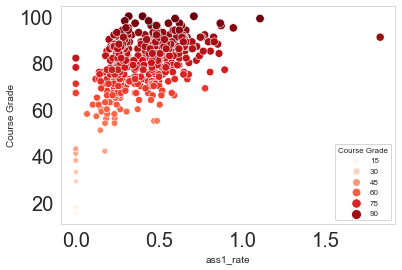

In [576]:
sns.scatterplot(data=merge_pd, x='ass1_rate', y='Course Grade', hue='Course Grade', size='Course Grade', palette="Reds")

<AxesSubplot:xlabel='ass1_rate', ylabel='Course Grade'>

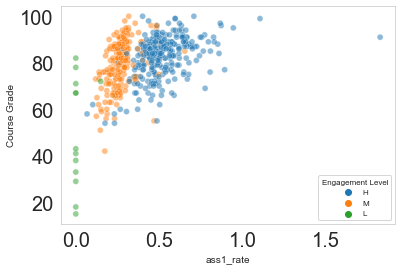

In [577]:
sns.scatterplot(data=merge_pd, x='ass1_rate', y='Course Grade', hue='Engagement Level',alpha=0.5)

<AxesSubplot:xlabel='ass1_rate', ylabel='Assignment01 [8]'>

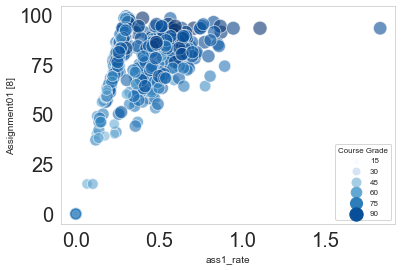

In [578]:
sns.scatterplot(data=merge_pd, x='ass1_rate', y='Assignment01 [8]', hue='Course Grade', size='Course Grade', sizes=(15, 200), palette="Blues",alpha=0.6)

In [579]:
sns.scatterplot(data=merge_pd, x='ass1_rate_minmax_norm', y='Course Grade', hue='Engagement Level',alpha=0.5)

<AxesSubplot:xlabel='ass1_rate_minmax_norm', ylabel='Course Grade'>

<AxesSubplot:xlabel='ass1_rate_minmax_norm', ylabel='Final Exam [35]'>

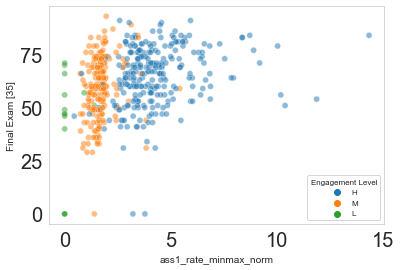

In [580]:
sns.scatterplot(data=merge_pd, x='ass1_rate_minmax_norm', y='Final Exam [35]', hue='Engagement Level',alpha=0.5)

<AxesSubplot:xlabel='ass1_rate_minmax_norm', ylabel='Assignment01 [8]'>

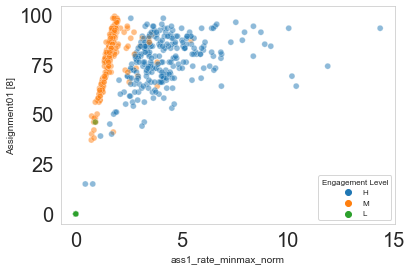

In [581]:
sns.scatterplot(data=merge_pd, x='ass1_rate_minmax_norm', y='Assignment01 [8]', hue='Engagement Level',alpha=0.5)

<AxesSubplot:xlabel='ass1_rate_minmax_norm', ylabel='ass1_score_minmax_norm'>

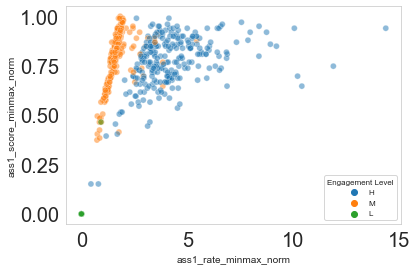

In [582]:
sns.scatterplot(data=merge_pd, x='ass1_rate_minmax_norm', y='ass1_score_minmax_norm', hue='Engagement Level',alpha=0.5)

In [583]:
sns.scatterplot(data=merge_pd, x='ass1_rate_minmax_norm', y='ass1_time_minmax_norm', hue='Engagement Level',alpha=0.5)

<AxesSubplot:xlabel='ass1_rate_minmax_norm', ylabel='ass1_time_minmax_norm'>

<AxesSubplot:xlabel='ass1_rate_minmax_norm', ylabel='ass1_score_minmax_norm'>

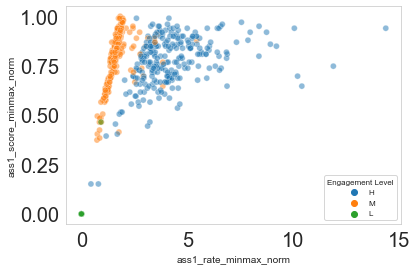

In [584]:
sns.scatterplot(data=merge_pd, x='ass1_rate_minmax_norm', y='ass1_score_minmax_norm', hue='Engagement Level',alpha=0.5)

In [585]:
ass1_h = merge_pd[merge_pd['Engagement Level']=='H']

In [586]:
ass1_h

Student ID  # Logins  # Content Reads  # Forum Reads  # Forum Posts  \
0    student000000       143              344             58              0   
5    student000005        62              358              0              0   
7    student000007        78              237              0              0   
14   student000014        78              413              1              0   
15   student000015        31              183              0              0   
..             ...       ...              ...            ...            ...   
479  student000479       141              385              0              0   
480  student000480       105              188              0              0   
481  student000481        98              281              0              0   
482  student000482        85              258              1              0   
484  student000484        51              158              0              0   

     # Quiz Reviews before submission  Assignment 1 lateness indicator  \
0                                   3                                0   
5                                   0                                0   
7                                   3                                0   
14                                  9                                0   
15                                  0                                0   
..                                ...                              ...   
479                                 2                                0   
480                                 3                                0   
481                                 1                                0   
482                                 2                                0   
484                                 2                                0   

     Assignment 2 lateness indicator  Assignment 3 lateness indicator  \
0                                  0                                0   
5                                  0                                0   
7                                  0                                0   
14                                 0                                0   
15                                 0                                0   
..                               ...                              ...   
479                                0                                0   
480                                0                                0   
481                                0                                0   
482                                0                                0   
484                                0                                0   

     Assignment 1 duration to submit (in hours)  ...  Class  ass1_rate  \
0                                    178.166667  ...      G   0.510758   
5                                    182.800000  ...      G   0.432166   
7                                    171.216667  ...      G   0.379636   
14                                   169.666667  ...      G   0.542240   
15                                   196.533333  ...      G   0.407056   
..                                          ...  ...    ...        ...   
479                                  162.600000  ...      G   0.479705   
480                                  137.933333  ...      G   0.500242   
481                                  175.200000  ...      G   0.485160   
482                                  127.633333  ...      G   0.532776   
484                                  125.900000  ...      G   0.540111   

     ass2_rate ass3_rate  ass1_time_minmax_norm  ass1_score_minmax_norm  \
0     0.970699  0.723099               0.250994                0.919192   
5     0.967921  0.761610               0.260131                0.797980   
7     0.777372  0.697674               0.237289                0.656566   
14    1.031107  0.789474               0.234233                0.929293   
15    0.829182  0.717722     

In [587]:
ass1_m = merge_pd[merge_pd['Engagement Level']=='M']

In [588]:
ass1_m

Student ID  # Logins  # Content Reads  # Forum Reads  # Forum Posts  \
1    student000001        70              342              0              0   
2    student000002        42              219              0              0   
3    student000003        92              271              2              0   
4    student000004       116              379              0              0   
6    student000006        76              213              0              0   
..             ...       ...              ...            ...            ...   
472  student000472        62              194              0              0   
473  student000473       102              369              0              0   
477  student000477       152              293              0              0   
483  student000483        99              206              0              0   
485  student000485        89              289              0              0   

     # Quiz Reviews before submission  Assignment 1 lateness indicator  \
1                                   4                                0   
2                                   3                                0   
3                                   6                                0   
4                                   1                                0   
6                                   0                                0   
..                                ...                              ...   
472                                 3                                0   
473                                 2                                0   
477                                 3                                0   
483                                 6                                0   
485                                 0                                0   

     Assignment 2 lateness indicator  Assignment 3 lateness indicator  \
1                                  0                                0   
2                                  0                                0   
3                                  0                                0   
4                                  0                                0   
6                                  0                                0   
..                               ...                              ...   
472                                0                                0   
473                                0                                0   
477                                0                                0   
483                                0                                0   
485                                0                                0   

     Assignment 1 duration to submit (in hours)  ...  Class  ass1_rate  \
1                                    294.033333  ...      G   0.258474   
2                                    169.600000  ...      G   0.241745   
3                                    341.150000  ...      G   0.228638   
4                                    325.500000  ...      G   0.279570   
6                                    220.600000  ...      G   0.412511   
..                                          ...  ...    ...        ...   
472                                  312.883333  ...      G   0.220529   
473                                  302.650000  ...      G   0.251115   
477                                  305.216667  ...      G   0.271938   
483                                  177.850000  ...      G   0.483554   
485                                  313.183333  ...      G   0.258634   

     ass2_rate ass3_rate  ass1_time_minmax_norm  ass1_score_minmax_norm  \
1     0.311092  0.335247               0.479475                0.767677   
2     0.258767  0.280410               0.234101                0.414141   
3     0.321269  0.291280               0.572386                0.787879   
4     0.338577  0.322168               0.541526                0.919192   
6     0.404024  0.351423     

In [1141]:
cg_f6 = merge_pd[merge_pd['Course Grade']<=50]

In [1142]:
cg_f7 = merge_pd[(merge_pd['Course Grade']<=70) & (merge_pd['Course Grade']>50)]

In [591]:
cg_f8 = merge_pd[(merge_pd['Course Grade']<=80) & (merge_pd['Course Grade']>70)]

In [592]:
cg_f8

Student ID  # Logins  # Content Reads  # Forum Reads  # Forum Posts  \
1    student000001        70              342              0              0   
2    student000002        42              219              0              0   
3    student000003        92              271              2              0   
11   student000011       101              301              0              0   
15   student000015        31              183              0              0   
..             ...       ...              ...            ...            ...   
463  student000463        85               82              0              0   
474  student000474       102              315              0              0   
475  student000475        61              100              0              0   
476  student000476       117              494              0              0   
484  student000484        51              158              0              0   

     # Quiz Reviews before submission  Assignment 1 lateness indicator  \
1                                   4                                0   
2                                   3                                0   
3                                   6                                0   
11                                  3                                0   
15                                  0                                0   
..                                ...                              ...   
463                                 0                                0   
474                                 3                                0   
475                                 0                                0   
476                                 2                                0   
484                                 2                                0   

     Assignment 2 lateness indicator  Assignment 3 lateness indicator  \
1                                  0                                0   
2                                  0                                0   
3                                  0                                0   
11                                 0                                0   
15                                 0                                0   
..                               ...                              ...   
463                                0                                0   
474                                0                                0   
475                                0                                1   
476                                0                                0   
484                                0                                0   

     Assignment 1 duration to submit (in hours)  ...  Class  ass1_rate  \
1                                    294.033333  ...      G   0.258474   
2                                    169.600000  ...      G   0.241745   
3                                    341.150000  ...      G   0.228638   
11                                   246.583333  ...      G   0.377154   
15                                   196.533333  ...      G   0.407056   
..                                          ...  ...    ...        ...   
463                                  194.916667  ...      G   0.405301   
474                                  160.900000  ...      G   0.453698   
475                                  307.516667  ...      G   0.149585   
476                                  155.883333  ...      G   0.538865   
484                                  125.900000  ...      G   0.540111   

     ass2_rate ass3_rate  ass1_time_minmax_norm  ass1_score_minmax_norm  \
1     0.311092  0.335247               0.479475                0.767677   
2     0.258767  0.280410               0.234101                0.414141   
3     0.321269  0.291280               0.572386                0.787879   
11    0.432510  0.357728               0.385907                0.939394   
15    0.829182  0.717722     

<AxesSubplot:xlabel='ass1_rate', ylabel='Course Grade'>

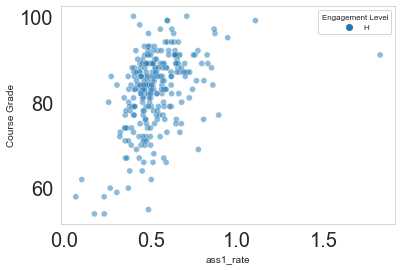

In [593]:
sns.scatterplot(data=ass1_h, x='ass1_rate', y='Course Grade', hue='Engagement Level',alpha=0.5)

In [600]:
sns.scatterplot(data=ass1_h, x='ass1_rate', y='ass1_score_minmax_norm', hue='Course Grade', size = 'Course Grade',alpha=0.3)
sns.scatterplot(data=cg_f6[cg_f6['Engagement Level']=='H'], x='ass1_rate', y='ass1_score_minmax_norm', marker = 'x', sizes = 60)
sns.scatterplot(data=cg_f7[cg_f7['Engagement Level']=='H'], x='ass1_rate', y='ass1_score_minmax_norm', marker = 'o', sizes = 40)
sns.scatterplot(data=cg_f8[cg_f8['Engagement Level']=='H'], x='ass1_rate', y='ass1_score_minmax_norm', marker = '.', sizes = 40)


<AxesSubplot:xlabel='ass1_rate', ylabel='ass1_score_minmax_norm'>

In [595]:
sns.scatterplot(data=ass1_h, x='ass1_score_minmax_norm', y='Course Grade', hue='Engagement Level',alpha=0.5)

<AxesSubplot:xlabel='ass1_score_minmax_norm', ylabel='Course Grade'>

<AxesSubplot:xlabel='ass1_time_minmax_norm', ylabel='Course Grade'>

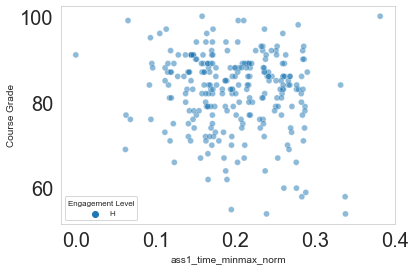

In [596]:
sns.scatterplot(data=ass1_h, x='ass1_time_minmax_norm', y='Course Grade', hue='Engagement Level',alpha=0.5)

<AxesSubplot:xlabel='ass1_rate', ylabel='Course Grade'>

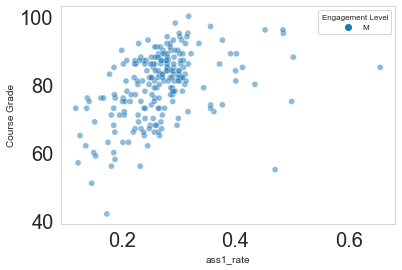

In [597]:
sns.scatterplot(data=ass1_m, x='ass1_rate', y='Course Grade', hue='Engagement Level',alpha=0.5)

<AxesSubplot:xlabel='ass1_rate_minmax_norm', ylabel='ass1_score_minmax_norm'>

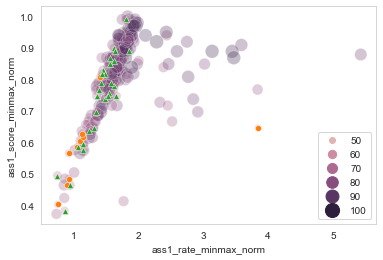

In [225]:
sns.scatterplot(data=ass1_m, x='ass1_rate_minmax_norm', y='ass1_score_minmax_norm', hue='Course Grade', size = 'Course Grade', sizes=(10, 200),alpha=0.3)
sns.scatterplot(data=cg_f6[cg_f6['Engagement Level']=='M'], x='ass1_rate_minmax_norm', y='ass1_score_minmax_norm', marker = 'o', sizes = 50)
sns.scatterplot(data=cg_f7[cg_f7['Engagement Level']=='M'], x='ass1_rate_minmax_norm', y='ass1_score_minmax_norm', marker = '^', sizes = 50)


<AxesSubplot:xlabel='ass1_score_minmax_norm', ylabel='Course Grade'>

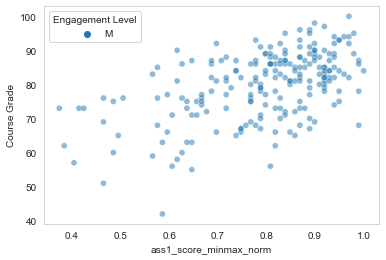

In [168]:
sns.scatterplot(data=ass1_m, x='ass1_score_minmax_norm', y='Course Grade', hue='Engagement Level',alpha=0.5)

<AxesSubplot:xlabel='ass1_time_minmax_norm', ylabel='Course Grade'>

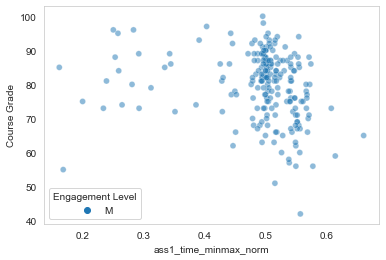

In [174]:
sns.scatterplot(data=ass1_m, x='ass1_time_minmax_norm', y='Course Grade', hue='Engagement Level',alpha=0.5)

In [1145]:
merge_pd

Student ID  # Logins  # Content Reads  # Forum Reads  # Forum Posts  \
0    student000000       143              344             58              0   
1    student000001        70              342              0              0   
2    student000002        42              219              0              0   
3    student000003        92              271              2              0   
4    student000004       116              379              0              0   
..             ...       ...              ...            ...            ...   
481  student000481        98              281              0              0   
482  student000482        85              258              1              0   
483  student000483        99              206              0              0   
484  student000484        51              158              0              0   
485  student000485        89              289              0              0   

     # Quiz Reviews before submission  Assignment 1 lateness indicator  \
0                                   3                                0   
1                                   4                                0   
2                                   3                                0   
3                                   6                                0   
4                                   1                                0   
..                                ...                              ...   
481                                 1                                0   
482                                 2                                0   
483                                 6                                0   
484                                 2                                0   
485                                 0                                0   

     Assignment 2 lateness indicator  Assignment 3 lateness indicator  \
0                                  0                                0   
1                                  0                                0   
2                                  0                                0   
3                                  0                                0   
4                                  0                                0   
..                               ...                              ...   
481                                0                                0   
482                                0                                0   
483                                0                                0   
484                                0                                0   
485                                0                                0   

     Assignment 1 duration to submit (in hours)  ...  Class  ass1_rate  \
0                                    178.166667  ...      G   0.510758   
1                                    294.033333  ...      G   0.258474   
2                                    169.600000  ...      G   0.241745   
3                                    341.150000  ...      G   0.228638   
4                                    325.500000  ...      G   0.279570   
..                                          ...  ...    ...        ...   
481                                  175.200000  ...      G   0.485160   
482                                  127.633333  ...      G   0.532776   
483                                  177.850000  ...      G   0.483554   
484                                  125.900000  ...      G   0.540111   
485                                  313.183333  ...      G   0.258634   

     ass2_rate ass3_rate  ass1_time_minmax_norm  ass1_score_minmax_norm  \
0     0.970699  0.723099               0.250994                0.919192   
1     0.311092  0.335247               0.479475                0.767677   
2     0.258767  0.280410               0.234101                0.414141   
3     0.321269  0.291280               0.572386                0.787879   
4     0.338577  0.322168     

In [1144]:
merge_pd['Assignment01 [8]'].mean()

75.47942386831275

In [1150]:
merge_pd['Assignment01 [8]'].std()

17.733496421673046

In [1151]:
merge_pd['Assignment02 [12]'].mean()

77.13374485596708

In [1152]:
merge_pd['Assignment02 [12]'].std()

15.179632758713455

In [1153]:
merge_pd['Assignment03 [25]'].mean()

80.87037037037037

In [1154]:
merge_pd['Assignment03 [25]'].std()

12.986498407710636

In [1155]:
merge_pd['Course Grade'].mean()

80.38271604938272

In [1156]:
merge_pd['Course Grade'].std()

11.267031992829935

In [729]:
ass1_h['Assignment01 [8]'].mean()

76.52713178294573

In [730]:
ass1_h['Assignment01 [8]'].std()

12.817532690440212

In [731]:
ass1_m['Assignment01 [8]'].mean()

78.58411214953271

In [732]:
ass1_m['Assignment01 [8]'].std()

13.482380430468147

In [746]:
ass1_h['Course Grade'].mean()

82.47674418604652

In [747]:
ass1_h['Course Grade'].std()

8.997267303487954

In [749]:
ass1_m['Course Grade'].mean()

79.75233644859813

In [748]:
ass1_m['Course Grade'].std()

9.93402504880617

In [735]:
ass1_h['Assignment02 [12]'].mean()

78.95348837209302

In [736]:
ass1_h['Assignment02 [12]'].std()

10.75214970098869

In [737]:
ass1_m['Assignment02 [12]'].mean()

77.56542056074767

In [738]:
ass1_m['Assignment02 [12]'].std()

14.529326682949106

In [739]:
ass1_h['Assignment03 [25]'].mean()

81.61627906976744

In [740]:
ass1_h['Assignment03 [25]'].std()

9.7515860483709

In [741]:
ass1_m['Assignment03 [25]'].mean()

82.1588785046729

In [742]:
ass1_m['Assignment03 [25]'].std()

10.297590340048522

<AxesSubplot:xlabel='ass2_rate', ylabel='Course Grade'>

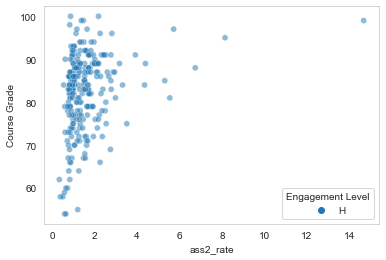

In [163]:
sns.scatterplot(data=ass1_h, x='ass2_rate', y='Course Grade', hue='Engagement Level',alpha=0.5)

<AxesSubplot:xlabel='Assignment02 [12]', ylabel='Course Grade'>

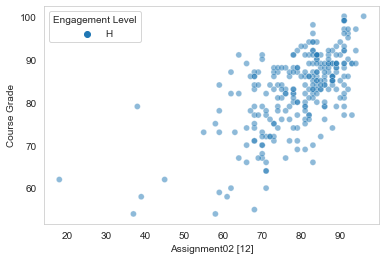

In [171]:
sns.scatterplot(data=ass1_h, x='Assignment02 [12]', y='Course Grade', hue='Engagement Level',alpha=0.5)

<AxesSubplot:xlabel='ass2_rate', ylabel='Course Grade'>

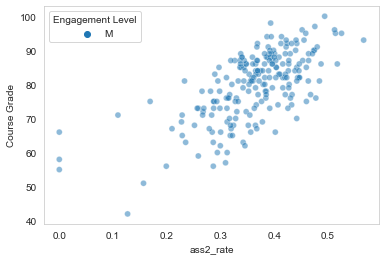

In [164]:
sns.scatterplot(data=ass1_m, x='ass2_rate', y='Course Grade', hue='Engagement Level',alpha=0.5)

<AxesSubplot:xlabel='Assignment02 [12]', ylabel='Course Grade'>

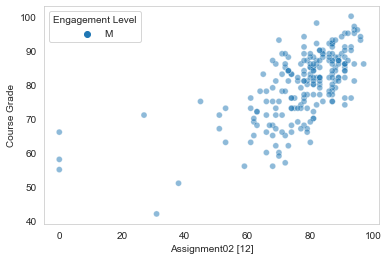

In [172]:
sns.scatterplot(data=ass1_m, x='Assignment02 [12]', y='Course Grade', hue='Engagement Level',alpha=0.5)

<AxesSubplot:xlabel='ass3_rate', ylabel='Course Grade'>

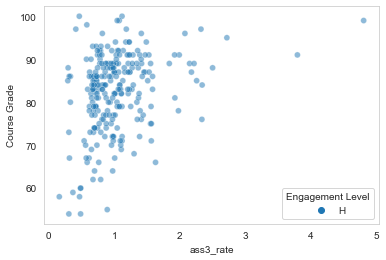

In [165]:
sns.scatterplot(data=ass1_h, x='ass3_rate', y='Course Grade', hue='Engagement Level',alpha=0.5)

<AxesSubplot:xlabel='ass3_rate', ylabel='Course Grade'>

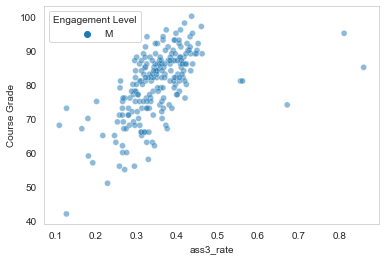

In [166]:
sns.scatterplot(data=ass1_m, x='ass3_rate', y='Course Grade', hue='Engagement Level',alpha=0.5)

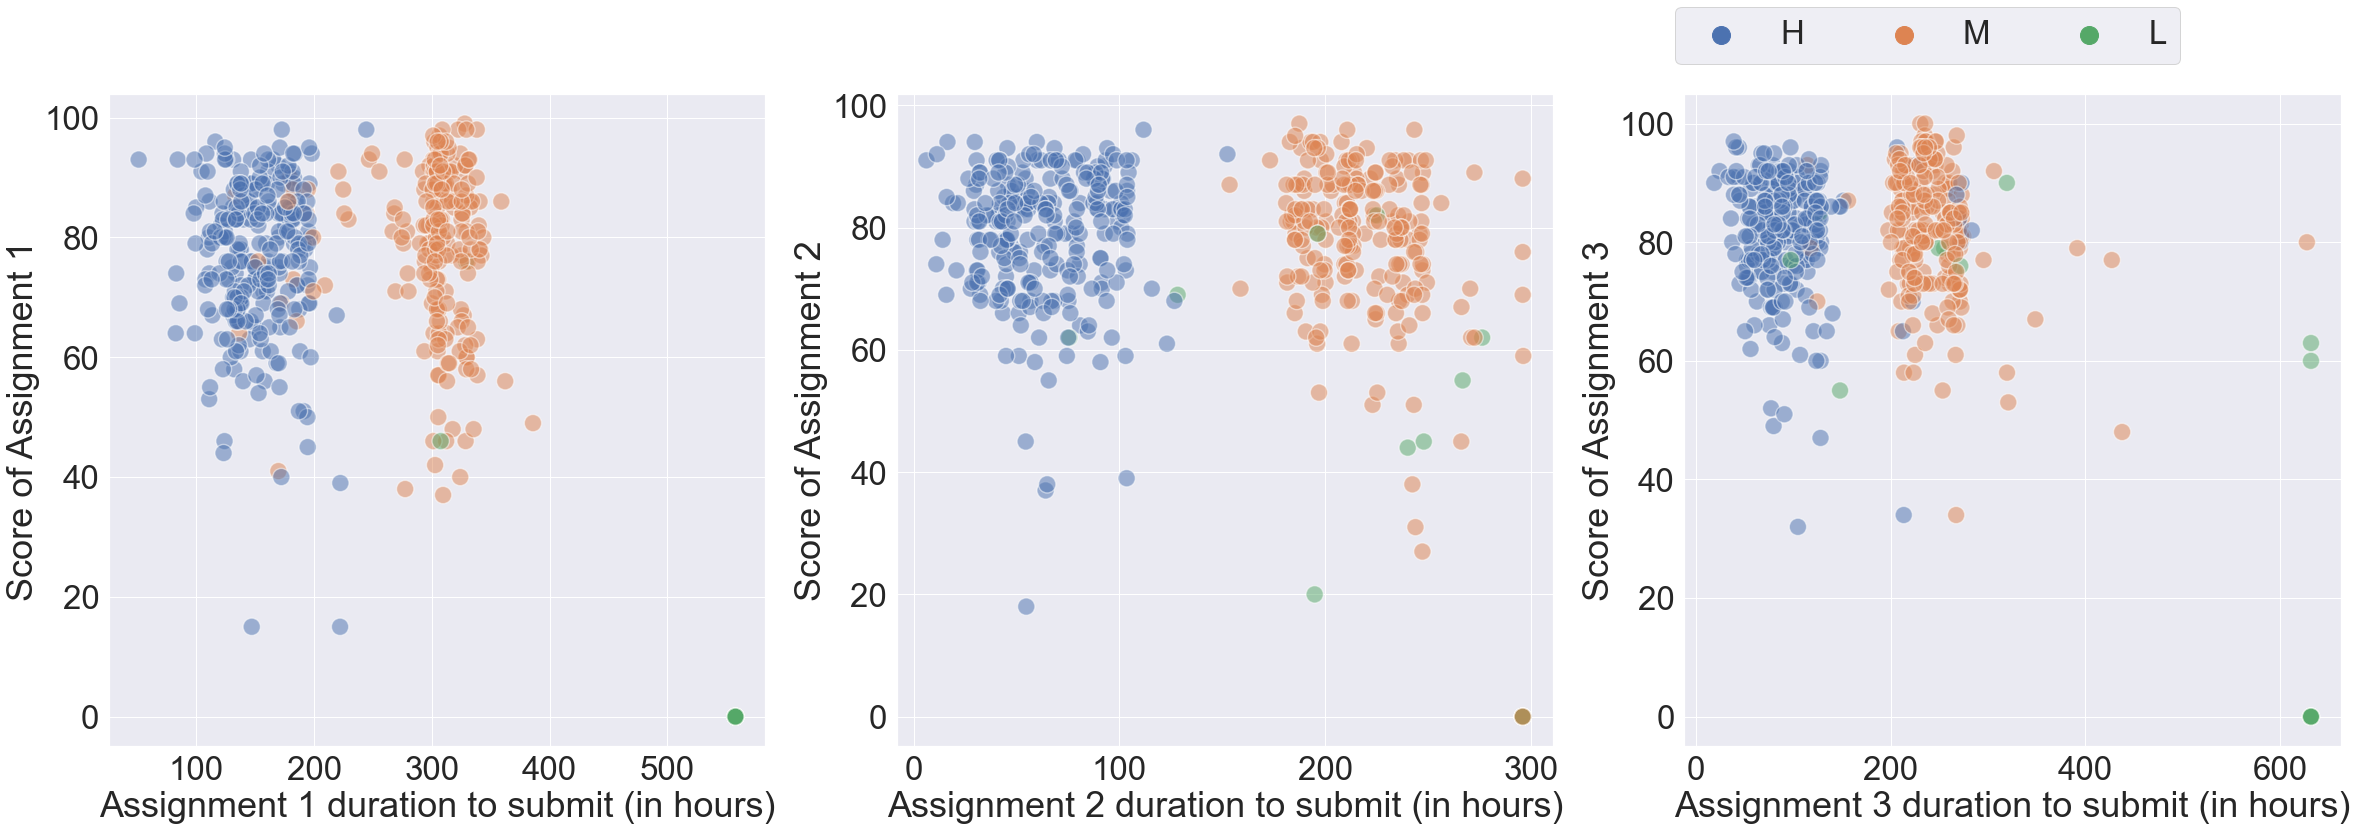

In [756]:

#plt.figure(figsize=(30,10))
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(40, 12))

sns.scatterplot(data=merge_pd, x='Assignment 1 duration to submit (in hours)', y='Assignment01 [8]', hue='Engagement Level', s =300, alpha=0.5, ax=ax1)
sns.scatterplot(data=merge_pd, x='Assignment 2 duration to submit (in hours)', y='Assignment02 [12]', hue='Engagement Level', s =300, alpha=0.5, ax=ax2)
sns.scatterplot(data=merge_pd, x='Assignment 3 duration to submit (in hours)', y='Assignment03 [25]', hue='Engagement Level', s =300, alpha=0.5, ax=ax3)
ax1.set_ylabel("Score of Assignment 1")
ax2.set_ylabel("Score of Assignment 2")
ax3.set_ylabel("Score of Assignment 3")
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=3, bbox_to_anchor=(.85, 1), markerscale=3)
ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.get_legend().remove()
sns.set(font_scale = 3)
#sns.title("Correlation between score ")
fig.savefig("time-score-cor.png")

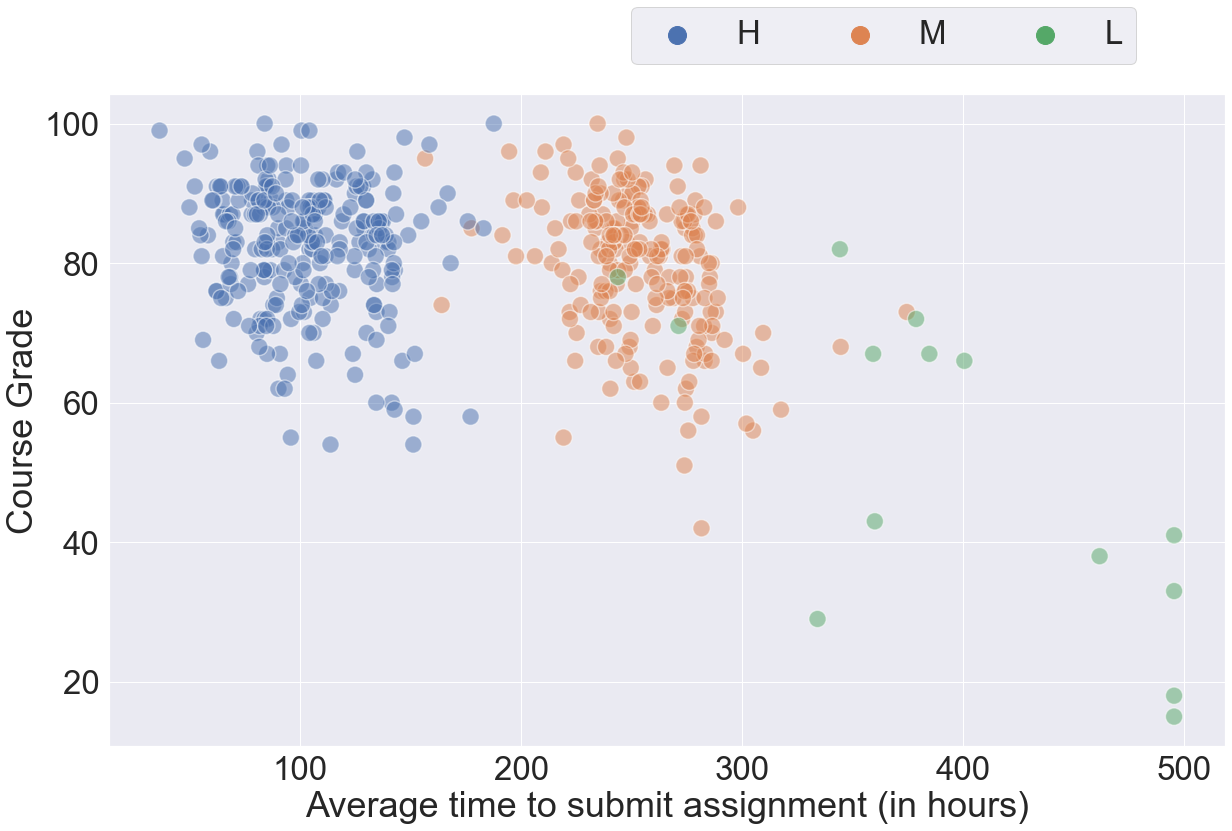

In [757]:

#plt.figure(figsize=(30,10))
fig, (ax1) = plt.subplots(1, 1, figsize=(20, 12))

sns.scatterplot(data=merge_pd, x='Average time to submit assignment (in hours)', y='Course Grade', hue='Engagement Level', s =300, alpha=0.5)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=3, bbox_to_anchor=(.85, 1), markerscale=3)
ax1.get_legend().remove()

sns.set(font_scale = 3)
#sns.title("Correlation between score ")
fig.savefig("avgtime-grade-cor.png")


[<matplotlib.collections.PathCollection object at 0x00000164867C70D0>, <matplotlib.collections.PathCollection object at 0x00000164867EE0A0>, <matplotlib.collections.PathCollection object at 0x00000164E30053A0>, <matplotlib.collections.PathCollection object at 0x00000164E3005850>, <matplotlib.collections.PathCollection object at 0x00000164E3005D00>, <matplotlib.collections.PathCollection object at 0x00000164E3015430>]


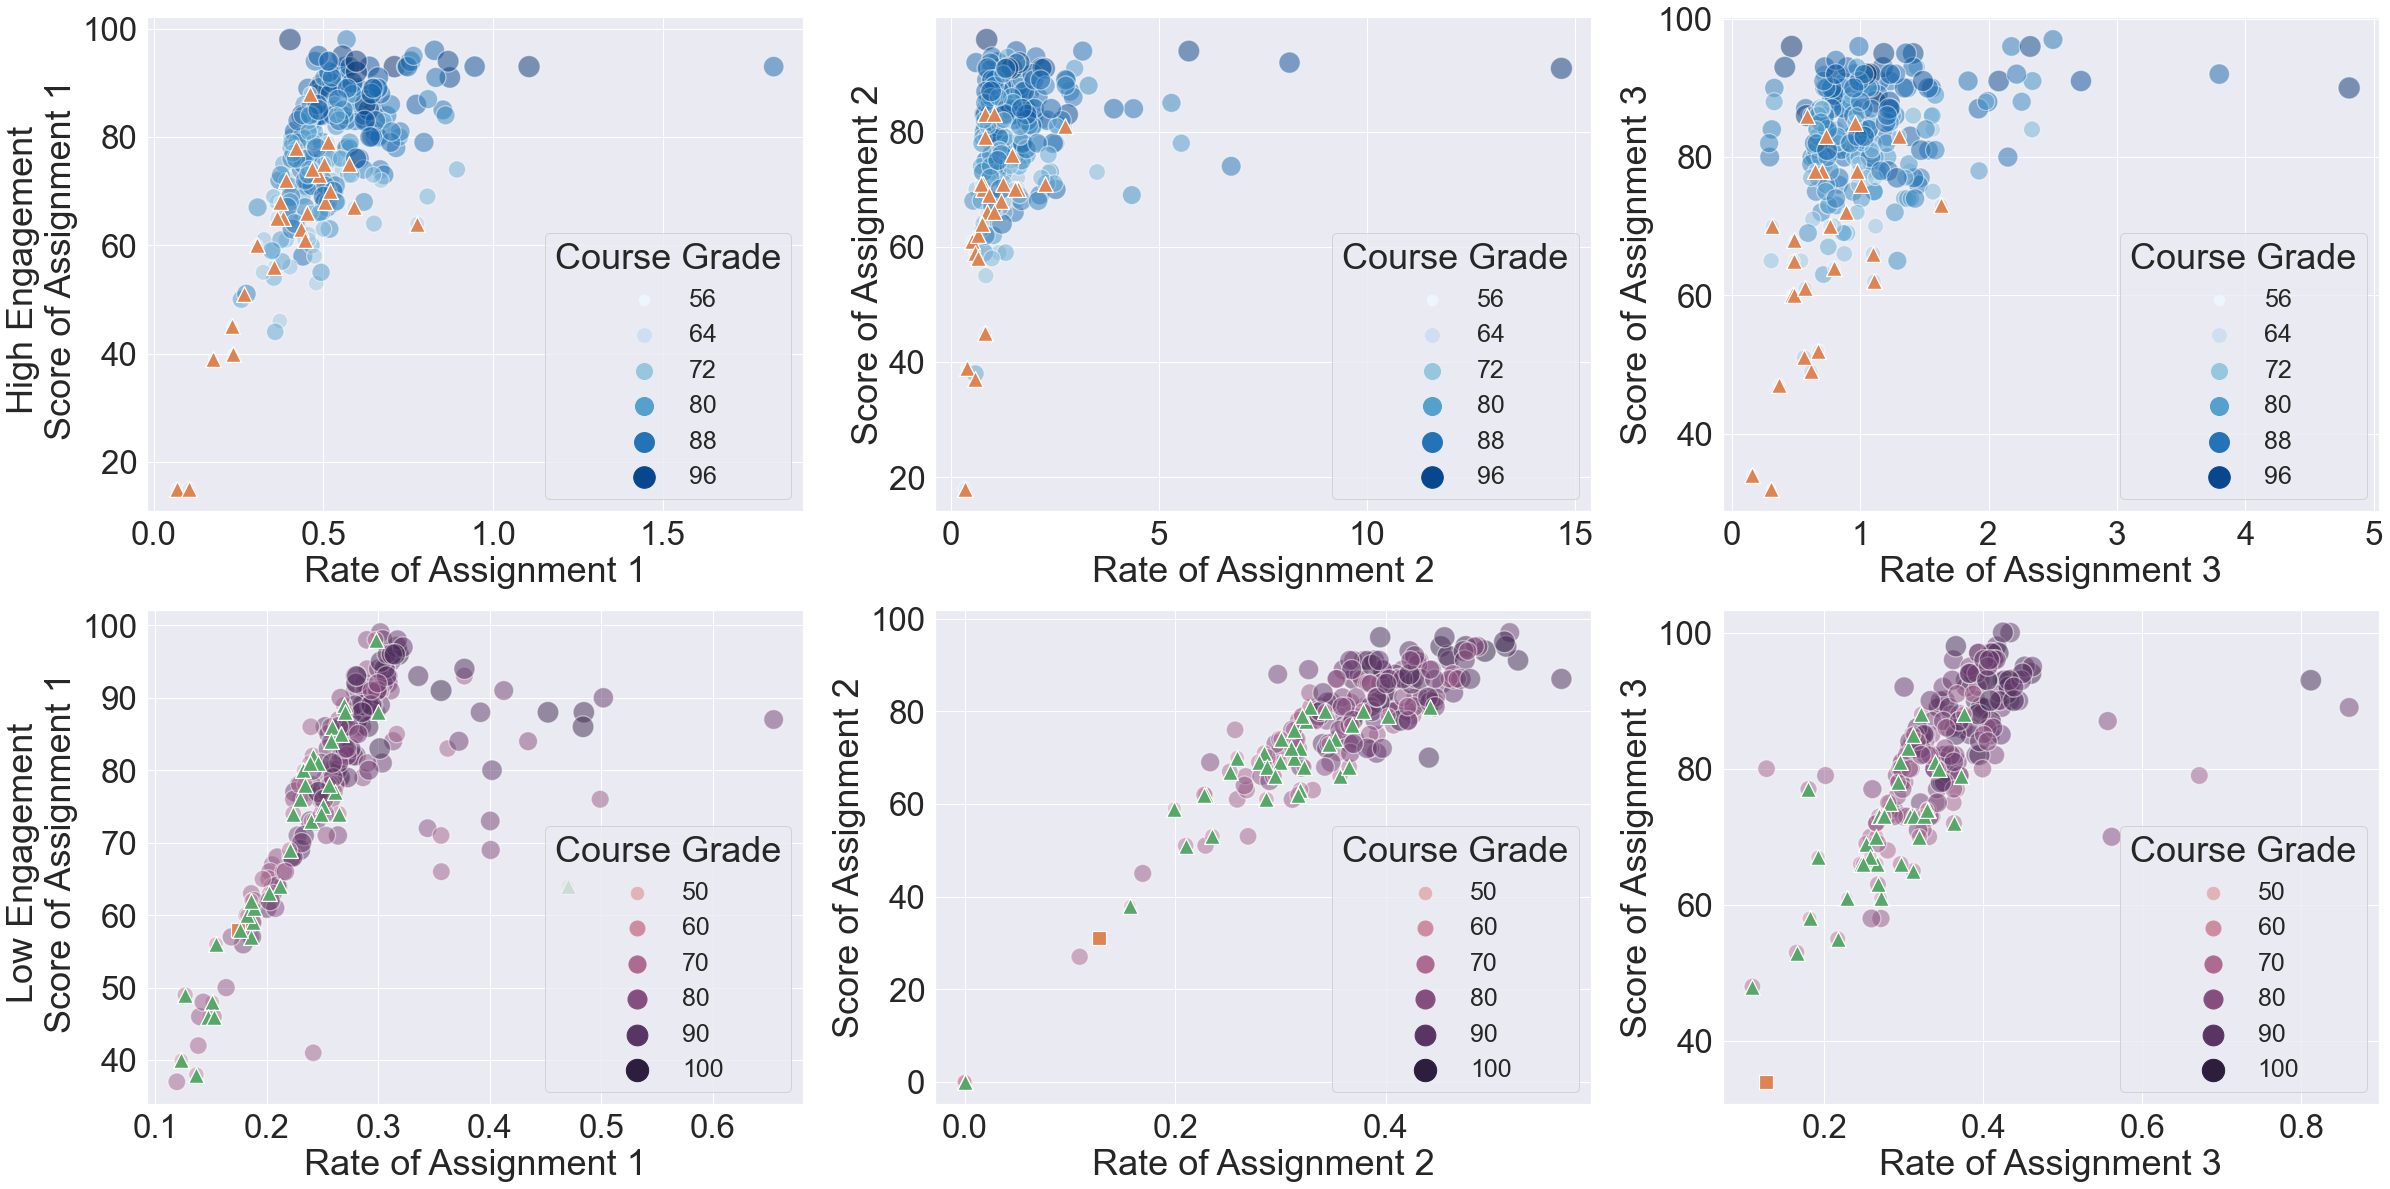

In [1143]:

#plt.figure(figsize=(30,10))
fig, axes = plt.subplots(2, 3, figsize=(40, 20))

sns.scatterplot(data=ass1_h, x='ass1_rate', y='Assignment01 [8]', hue='Course Grade', size = 'Course Grade', palette="Blues", sizes=(100, 500), alpha=0.5, ax=axes[0,0])
sns.scatterplot(data=cg_f6[cg_f6['Engagement Level']=='H'], x='ass1_rate', y='Assignment01 [8]', marker = 's', s = 220, ax=axes[0,0])
sns.scatterplot(data=cg_f7[cg_f7['Engagement Level']=='H'], x='ass1_rate', y='Assignment01 [8]', marker = '^', s = 250, ax=axes[0,0])


sns.scatterplot(data=ass1_h, x='ass2_rate', y='Assignment02 [12]', hue='Course Grade', size = 'Course Grade', palette="Blues", sizes=(100, 500), alpha=0.5, ax=axes[0,1])
sns.scatterplot(data=cg_f6[cg_f6['Engagement Level']=='H'], x='ass2_rate', y='Assignment02 [12]', marker = 's', s = 220, ax=axes[0,1])
sns.scatterplot(data=cg_f7[cg_f7['Engagement Level']=='H'], x='ass2_rate', y='Assignment02 [12]', marker = '^', s = 250, ax=axes[0,1])


sns.scatterplot(data=ass1_h, x='ass3_rate', y='Assignment03 [25]', hue='Course Grade', size = 'Course Grade', palette="Blues", sizes=(100, 500), alpha=0.5, ax=axes[0,2])
sns.scatterplot(data=cg_f6[cg_f6['Engagement Level']=='H'], x='ass3_rate', y='Assignment03 [25]', marker = 's', s = 220, ax=axes[0,2])
sns.scatterplot(data=cg_f7[cg_f7['Engagement Level']=='H'], x='ass3_rate', y='Assignment03 [25]', marker = '^', s = 250, ax=axes[0,2])

sns.scatterplot(data=ass1_m, x='ass1_rate', y='Assignment01 [8]', hue='Course Grade', size = 'Course Grade', sizes=(100, 500), alpha=0.5, ax=axes[1, 0])
sns.scatterplot(data=cg_f6[cg_f6['Engagement Level']=='M'], x='ass1_rate', y='Assignment01 [8]', marker = 's', s = 220, ax=axes[1,0])
sns.scatterplot(data=cg_f7[cg_f7['Engagement Level']=='M'], x='ass1_rate', y='Assignment01 [8]', marker = '^', s = 250, ax=axes[1,0])

sns.scatterplot(data=ass1_m, x='ass2_rate', y='Assignment02 [12]', hue='Course Grade', size = 'Course Grade', sizes=(100, 500), alpha=0.5, ax=axes[1,1])
sns.scatterplot(data=cg_f6[cg_f6['Engagement Level']=='M'], x='ass2_rate', y='Assignment02 [12]', marker = 's', s = 220, ax=axes[1,1])
sns.scatterplot(data=cg_f7[cg_f7['Engagement Level']=='M'], x='ass2_rate', y='Assignment02 [12]', marker = '^', s = 250, ax=axes[1,1])

sns.scatterplot(data=ass1_m, x='ass3_rate', y='Assignment03 [25]', hue='Course Grade', size = 'Course Grade', sizes=(100, 500), alpha=0.5, ax=axes[1,2])
sns.scatterplot(data=cg_f6[cg_f6['Engagement Level']=='M'], x='ass3_rate', y='Assignment03 [25]', marker = 's', s = 220, ax=axes[1,2])
sns.scatterplot(data=cg_f7[cg_f7['Engagement Level']=='M'], x='ass3_rate', y='Assignment03 [25]', marker = '^', s = 250, ax=axes[1,2])

#sns.legend()

for i in range(0, 2):
    for j in range(0, 3):
        axes[i,j].legend(loc='lower right', title="Course Grade", fontsize=25)
        axes[i,j].set_xlabel("Rate of Assignment "+ str(j+1))
        if (i==0) & (j == 0):
            axes[i,j].set_ylabel("High Engagement \n Score of Assignment "+ str(j+1))
        elif (i==1) & (j == 0):
            axes[i,j].set_ylabel("Low Engagement \n Score of Assignment "+ str(j+1))
        else:
            axes[i,j].set_ylabel("Score of Assignment "+ str(j+1))

handles, labels = axes[0,0].get_legend_handles_labels()
print(handles)

sns.set(font_scale = 3)
#sns.title("Correlation between score ")
fig.savefig("rate-score-grade.png")


In [1161]:

#plt.figure(figsize=(30,10))
fig, axes = plt.subplots(2, 3, figsize=(40, 20))

sns.scatterplot(data=ass1_h, x='ass1_rate', y='Assignment01 [8]', hue='Course Grade', size = 'Course Grade', palette="Blues", sizes=(100, 500), alpha=0.5, ax=axes[0,0])
sns.scatterplot(data=cg_f6[cg_f6['Engagement Level']=='H'], x='ass1_rate', y='Assignment01 [8]', marker = 's', s = 220, ax=axes[0,0])
sns.scatterplot(data=cg_f7[cg_f7['Engagement Level']=='H'], x='ass1_rate', y='Assignment01 [8]', marker = '^', s = 250, ax=axes[0,0])


sns.scatterplot(data=ass1_h, x='ass2_rate', y='Assignment02 [12]', hue='Course Grade', size = 'Course Grade', palette="Blues", sizes=(100, 500), alpha=0.5, ax=axes[0,1])
sns.scatterplot(data=cg_f6[cg_f6['Engagement Level']=='H'], x='ass2_rate', y='Assignment02 [12]', marker = 's', s = 220, ax=axes[0,1])
sns.scatterplot(data=cg_f7[cg_f7['Engagement Level']=='H'], x='ass2_rate', y='Assignment02 [12]', marker = '^', s = 250, ax=axes[0,1])


sns.scatterplot(data=ass1_h, x='ass3_rate', y='Assignment03 [25]', hue='Course Grade', size = 'Course Grade', palette="Blues", sizes=(100, 500), alpha=0.5, ax=axes[0,2])
sns.scatterplot(data=cg_f6[cg_f6['Engagement Level']=='H'], x='ass3_rate', y='Assignment03 [25]', marker = 's', s = 220, ax=axes[0,2])
sns.scatterplot(data=cg_f7[cg_f7['Engagement Level']=='H'], x='ass3_rate', y='Assignment03 [25]', marker = '^', s = 250, ax=axes[0,2])

sns.scatterplot(data=ass1_m, x='ass1_rate', y='Assignment01 [8]', hue='Course Grade', size = 'Course Grade', sizes=(100, 500), alpha=0.5, ax=axes[1, 0])
sns.scatterplot(data=cg_f6[cg_f6['Engagement Level']=='M'], x='ass1_rate', y='Assignment01 [8]', marker = 's', s = 220, ax=axes[1,0])
sns.scatterplot(data=cg_f7[cg_f7['Engagement Level']=='M'], x='ass1_rate', y='Assignment01 [8]', marker = '^', s = 250, ax=axes[1,0])

sns.scatterplot(data=ass1_m, x='ass2_rate', y='Assignment02 [12]', hue='Course Grade', size = 'Course Grade', sizes=(100, 500), alpha=0.5, ax=axes[1,1])
sns.scatterplot(data=cg_f6[cg_f6['Engagement Level']=='M'], x='ass2_rate', y='Assignment02 [12]', marker = 's', s = 220, ax=axes[1,1])
sns.scatterplot(data=cg_f7[cg_f7['Engagement Level']=='M'], x='ass2_rate', y='Assignment02 [12]', marker = '^', s = 250, ax=axes[1,1])

sns.scatterplot(data=ass1_m, x='ass3_rate', y='Assignment03 [25]', hue='Course Grade', size = 'Course Grade', sizes=(100, 500), alpha=0.5, ax=axes[1,2])
sns.scatterplot(data=cg_f6[cg_f6['Engagement Level']=='M'], x='ass3_rate', y='Assignment03 [25]', marker = 's', s = 220, ax=axes[1,2])
sns.scatterplot(data=cg_f7[cg_f7['Engagement Level']=='M'], x='ass3_rate', y='Assignment03 [25]', marker = '^', s = 250, ax=axes[1,2])

#sns.legend()

for i in range(0, 2):
    for j in range(0, 3):
        axes[i,j].legend(loc='lower right', fontsize=25)
        axes[i,j].set_xlabel("Rate of Assignment "+ str(j+1))
        if (i==0) & (j == 0):
            axes[i,j].set_ylabel("High Engagement \n Score of Assignment "+ str(j+1))
        elif (i==1) & (j == 0):
            axes[i,j].set_ylabel("Low Engagement \n Score of Assignment "+ str(j+1))
        else:
            axes[i,j].set_ylabel("Score of Assignment "+ str(j+1))

handles, labels = axes[0,0].get_legend_handles_labels()
print(handles)

axes[0,0].legend(loc='lower right', title="Course Grade", fontsize=25)

sns.set(font_scale = 3)
#sns.title("Correlation between score ")
fig.savefig("rate-score-grade.png")


[<matplotlib.collections.PathCollection object at 0x00000164F5C22F40>, <matplotlib.collections.PathCollection object at 0x00000164F5C4A5B0>, <matplotlib.collections.PathCollection object at 0x00000164F5C4AA60>, <matplotlib.collections.PathCollection object at 0x00000164F5C4AF10>, <matplotlib.collections.PathCollection object at 0x00000164F5C3D400>, <matplotlib.collections.PathCollection object at 0x00000164F5C4A0A0>]


In [606]:
sns.set(font_scale = 1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Assignment01 [8]', ylabel='Assignment 1 duration to submit (in hours)'>

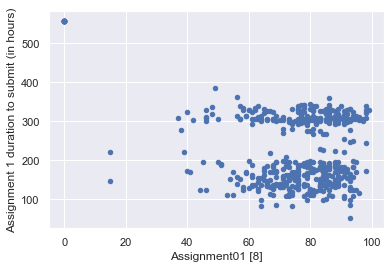

In [607]:
merge_pd.plot('Assignment01 [8]', 'Assignment 1 duration to submit (in hours)', kind='scatter')

In [610]:
sns.scatterplot(data=merge_pd, x='Assignment01 [8]', y='Assignment 1 duration to submit (in hours)', hue='Engagement Level',alpha=0.5)

<AxesSubplot:xlabel='Assignment01 [8]', ylabel='Assignment 1 duration to submit (in hours)'>

In [609]:
sns.scatterplot(data=merge_pd, x='Assignment01 [8]', y='Assignment 1 duration to submit (in hours)', hue='Course Grade', size='Course Grade', palette="Blues", sizes=(10,50),alpha=0.7)

<AxesSubplot:xlabel='Assignment01 [8]', ylabel='Assignment 1 duration to submit (in hours)'>

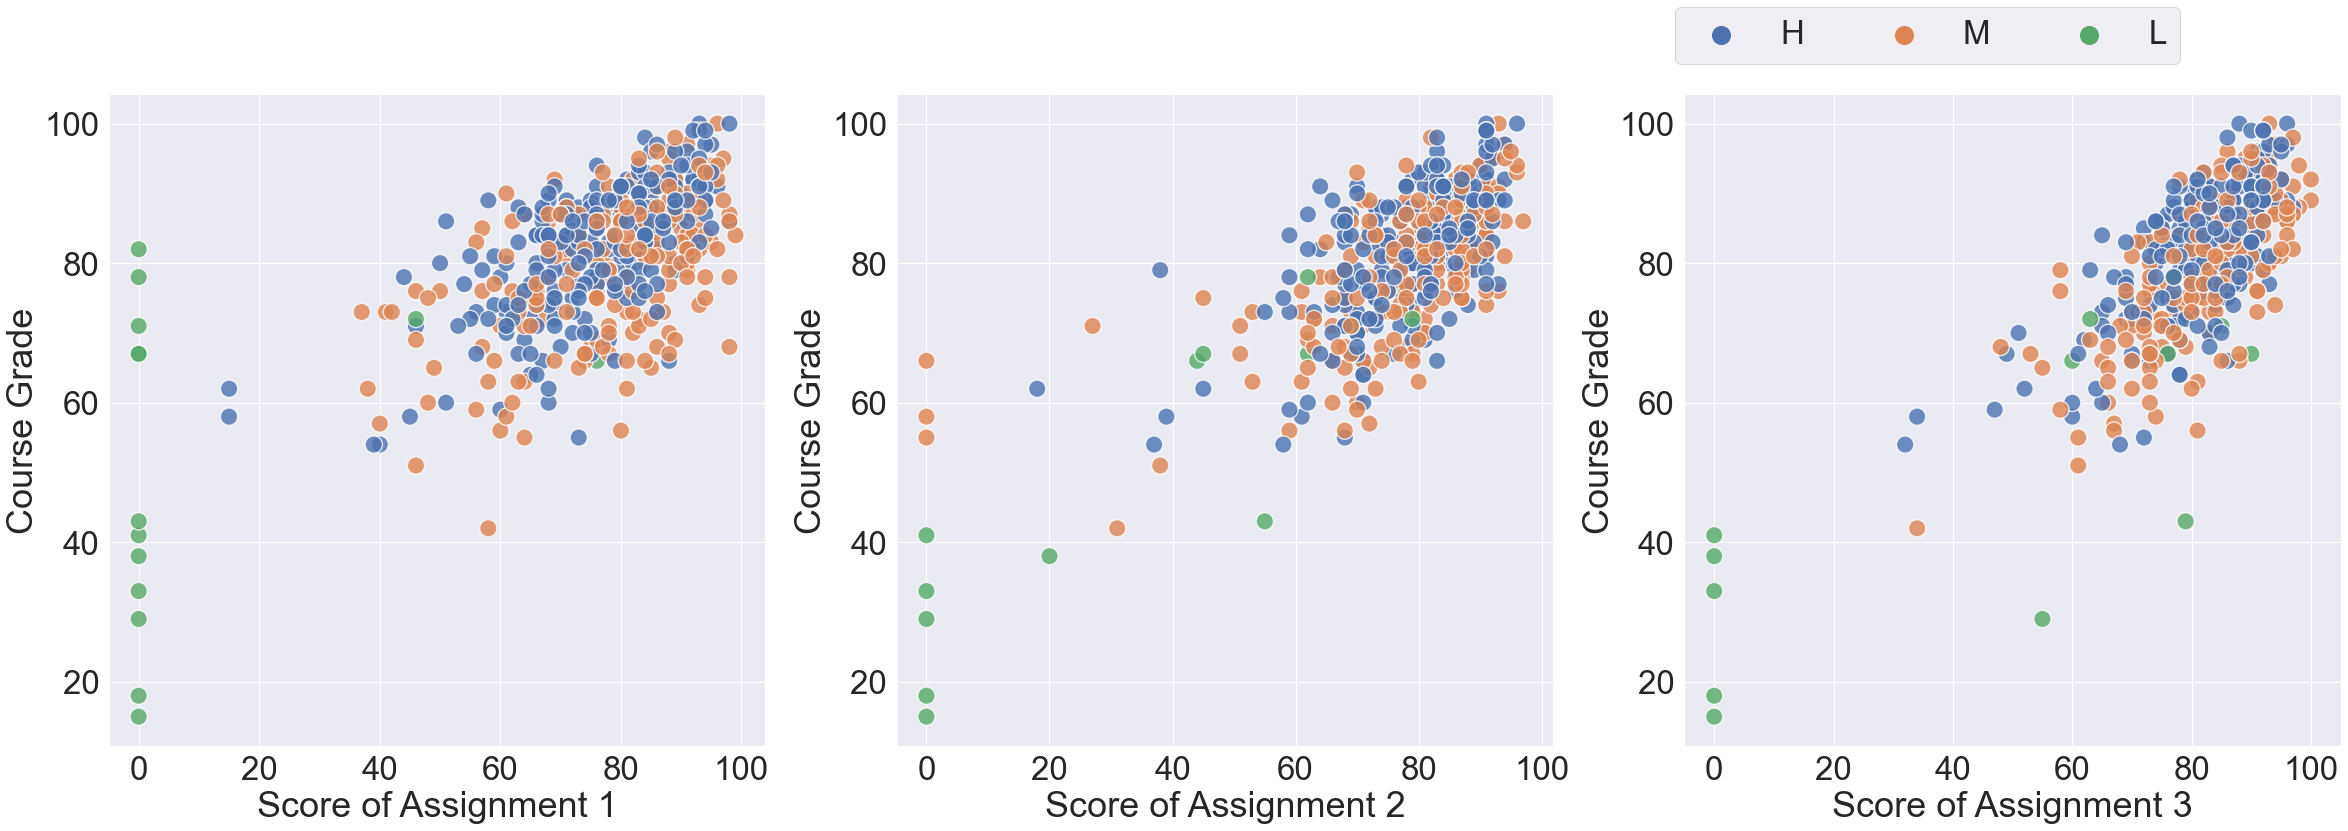

In [744]:

#plt.figure(figsize=(30,10))
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(40, 12))

sns.scatterplot(data=merge_pd, x='Assignment01 [8]', y='Course Grade', hue='Engagement Level', s =300, alpha=0.8, ax=ax1)
sns.scatterplot(data=merge_pd, x='Assignment02 [12]', y='Course Grade', hue='Engagement Level', s =300, alpha=0.8, ax=ax2)
sns.scatterplot(data=merge_pd, x='Assignment03 [25]', y='Course Grade', hue='Engagement Level', s =300, alpha=0.8, ax=ax3)
ax1.set_xlabel("Score of Assignment 1")
ax2.set_xlabel("Score of Assignment 2")
ax3.set_xlabel("Score of Assignment 3")

ax1.set_ylabel("Course Grade")
ax2.set_ylabel("Course Grade")
ax3.set_ylabel("Course Grade")
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=3, bbox_to_anchor=(.85, 1), markerscale=3)
ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.get_legend().remove()
sns.set(font_scale = 3)
#sns.title("Correlation between score ")
fig.savefig("score-assign-course.png")

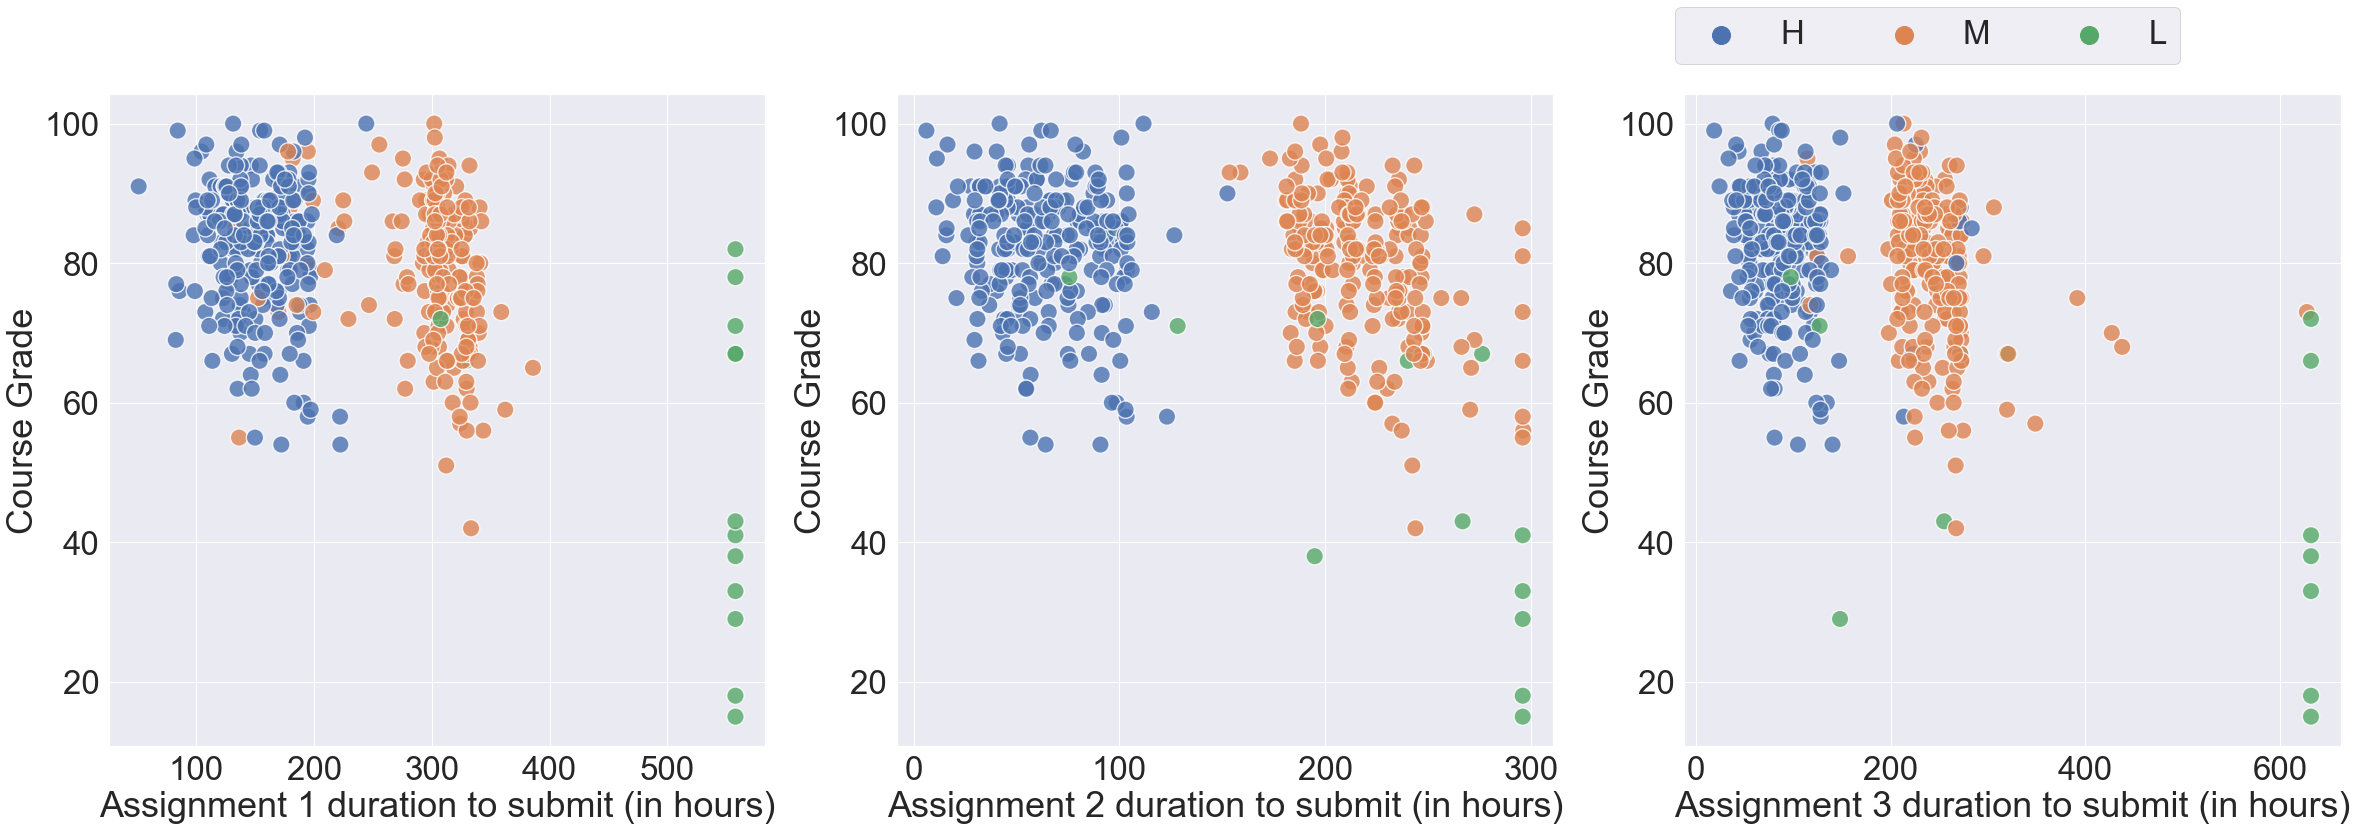

In [751]:

#plt.figure(figsize=(30,10))
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(40, 12))

sns.scatterplot(data=merge_pd, x='Assignment 1 duration to submit (in hours)', y='Course Grade', hue='Engagement Level', s =300, alpha=0.8, ax=ax1)
sns.scatterplot(data=merge_pd, x='Assignment 2 duration to submit (in hours)', y='Course Grade', hue='Engagement Level', s =300, alpha=0.8, ax=ax2)
sns.scatterplot(data=merge_pd, x='Assignment 3 duration to submit (in hours)', y='Course Grade', hue='Engagement Level', s =300, alpha=0.8, ax=ax3)

ax1.set_ylabel("Course Grade")
ax2.set_ylabel("Course Grade")
ax3.set_ylabel("Course Grade")
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=3, bbox_to_anchor=(.85, 1), markerscale=3)
ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.get_legend().remove()
sns.set(font_scale = 3)
#sns.title("Correlation between score ")
#fig.savefig("score-assign-course.png")

In [81]:
sns.scatterplot(data=merge_pd, x='Assignment01 [8]', y='Course Grade', hue='Engagement Level')

<AxesSubplot:xlabel='Assignment01 [8]', ylabel='Course Grade'>

In [539]:
sns.scatterplot(data=merge_pd, x='Assignment01 [8]', y='Final Exam [35]', hue='Engagement Level')

<AxesSubplot:xlabel='Assignment01 [8]', ylabel='Final Exam [35]'>

In [31]:
merge_pd.plot('Assignment 1 duration to submit (in hours)', 'Course Grade', kind='scatter')

<AxesSubplot:xlabel='Assignment 1 duration to submit (in hours)', ylabel='Course Grade'>

<AxesSubplot:xlabel='ass2_rate', ylabel='Assignment02 [12]'>

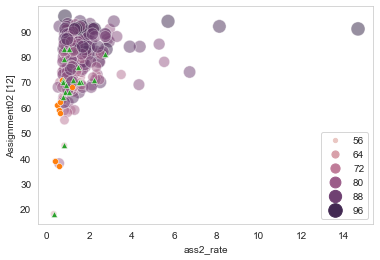

In [231]:
sns.scatterplot(data=ass1_h, x='ass2_rate', y='Assignment02 [12]', hue='Course Grade', size = 'Course Grade', sizes=(10, 200),alpha=0.5)
sns.scatterplot(data=cg_f6[cg_f6['Engagement Level']=='H'], x='ass2_rate', y='Assignment02 [12]', marker = 'o', sizes = 120)
sns.scatterplot(data=cg_f7[cg_f7['Engagement Level']=='H'], x='ass2_rate', y='Assignment02 [12]', marker = '^', sizes = 120)


<AxesSubplot:xlabel='ass2_rate', ylabel='Assignment02 [12]'>

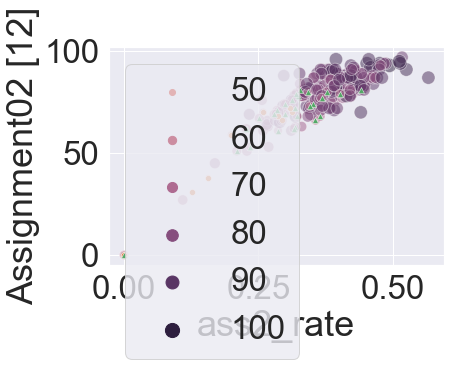

In [745]:
sns.scatterplot(data=ass1_m, x='ass2_rate', y='Assignment02 [12]', hue='Course Grade', size = 'Course Grade', sizes=(10, 200),alpha=0.5)
sns.scatterplot(data=cg_f6[cg_f6['Engagement Level']=='M'], x='ass2_rate', y='Assignment02 [12]', marker = 'o', sizes = 90)
sns.scatterplot(data=cg_f7[cg_f7['Engagement Level']=='M'], x='ass2_rate', y='Assignment02 [12]', marker = '^', sizes = 90)

<AxesSubplot:xlabel='ass3_rate', ylabel='Assignment03 [25]'>

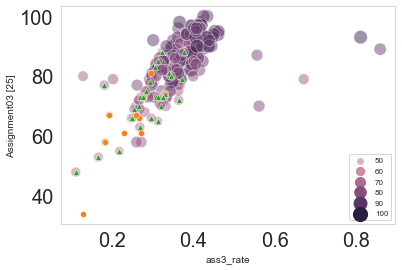

In [538]:
sns.scatterplot(data=ass1_m, x='ass3_rate', y='Assignment03 [25]', hue='Course Grade', size = 'Course Grade', sizes=(10, 200),alpha=0.5)
sns.scatterplot(data=cg_f6[cg_f6['Engagement Level']=='M'], x='ass3_rate', y='Assignment03 [25]', marker = 'o', sizes = 90)
sns.scatterplot(data=cg_f7[cg_f7['Engagement Level']=='M'], x='ass3_rate', y='Assignment03 [25]', marker = '^', sizes = 90)

<AxesSubplot:xlabel='ass3_rate', ylabel='Assignment03 [25]'>

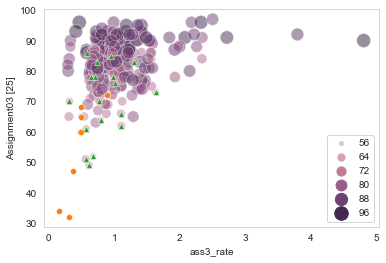

In [230]:
sns.scatterplot(data=ass1_h, x='ass3_rate', y='Assignment03 [25]', hue='Course Grade', size = 'Course Grade', sizes=(10, 200),alpha=0.5)
sns.scatterplot(data=cg_f6[cg_f6['Engagement Level']=='H'], x='ass3_rate', y='Assignment03 [25]', marker = 'o', sizes = 120)
sns.scatterplot(data=cg_f7[cg_f7['Engagement Level']=='H'], x='ass3_rate', y='Assignment03 [25]', marker = '^', sizes = 120)

<AxesSubplot:xlabel='ass2_rate', ylabel='Assignment02 [12]'>

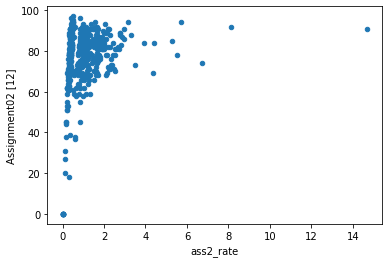

In [32]:
merge_pd.plot('ass2_rate', 'Assignment02 [12]', kind='scatter')

<AxesSubplot:xlabel='ass2_rate', ylabel='Course Grade'>

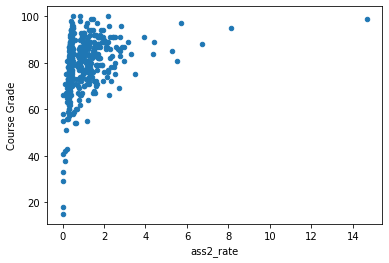

In [24]:
merge_pd.plot('ass2_rate', 'Course Grade', kind='scatter')

<AxesSubplot:xlabel='Assignment02 [12]', ylabel='Assignment 2 duration to submit (in hours)'>

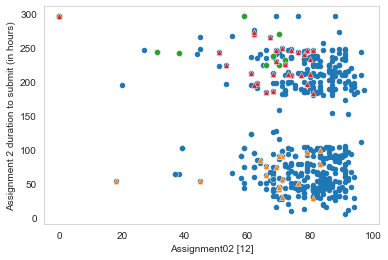

In [234]:
merge_pd.plot('Assignment02 [12]', 'Assignment 2 duration to submit (in hours)', kind='scatter')
sns.scatterplot(data=cg_f6[cg_f6['Engagement Level']=='H'], x='Assignment02 [12]', y='Assignment 2 duration to submit (in hours)', marker = 'o', sizes = 120)
sns.scatterplot(data=cg_f7[cg_f7['Engagement Level']=='H'], x='Assignment02 [12]', y='Assignment 2 duration to submit (in hours)', marker = '^', sizes = 120)
sns.scatterplot(data=cg_f6[cg_f6['Engagement Level']=='M'], x='Assignment02 [12]', y='Assignment 2 duration to submit (in hours)', marker = 'o', sizes = 120)
sns.scatterplot(data=cg_f7[cg_f7['Engagement Level']=='M'], x='Assignment02 [12]', y='Assignment 2 duration to submit (in hours)', marker = '^', sizes = 120)

<AxesSubplot:xlabel='Assignment02 [12]', ylabel='Course Grade'>

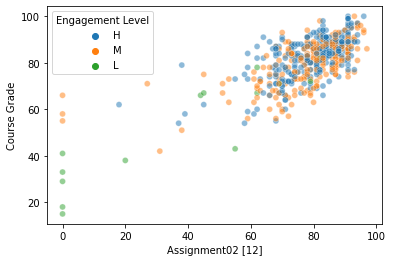

In [90]:
sns.scatterplot(data=merge_pd, x='Assignment02 [12]', y='Course Grade', hue='Engagement Level',alpha=0.5)

<AxesSubplot:xlabel='Assignment02 [12]', ylabel='Final Exam [35]'>

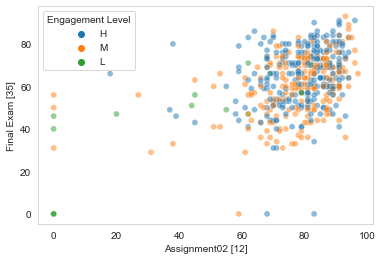

In [111]:
sns.scatterplot(data=merge_pd, x='Assignment02 [12]', y='Final Exam [35]', hue='Engagement Level',alpha=0.5)

<AxesSubplot:xlabel='ass2_rate', ylabel='Course Grade'>

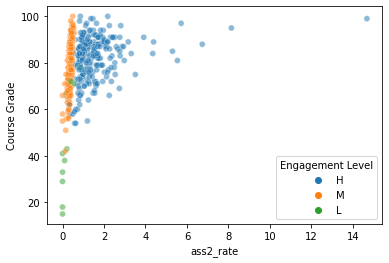

In [89]:
sns.scatterplot(data=merge_pd, x='ass2_rate', y='Course Grade', hue='Engagement Level',alpha=0.5)

<AxesSubplot:xlabel='ass3_rate', ylabel='Course Grade'>

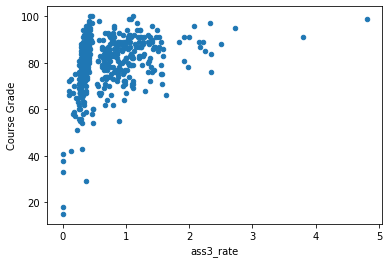

In [25]:
merge_pd.plot('ass3_rate', 'Course Grade', kind='scatter')

<AxesSubplot:xlabel='Assignment03 [25]', ylabel='Assignment 3 duration to submit (in hours)'>

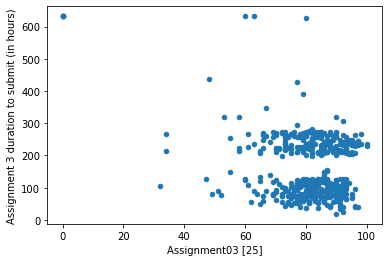

In [29]:
merge_pd.plot('Assignment03 [25]', 'Assignment 3 duration to submit (in hours)', kind='scatter')

<AxesSubplot:xlabel='Assignment 3 duration to submit (in hours)', ylabel='Course Grade'>

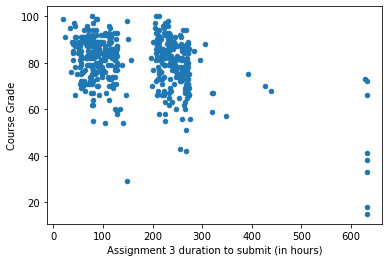

In [30]:
merge_pd.plot('Assignment 3 duration to submit (in hours)', 'Course Grade', kind='scatter')

<AxesSubplot:xlabel='ass3_rate', ylabel='Course Grade'>

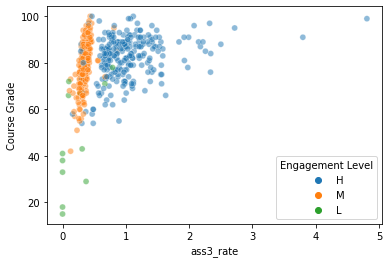

In [86]:
sns.scatterplot(data=merge_pd, x='ass3_rate', y='Course Grade', hue='Engagement Level',alpha=0.5)

<AxesSubplot:xlabel='ass3_rate', ylabel='Final Exam [35]'>

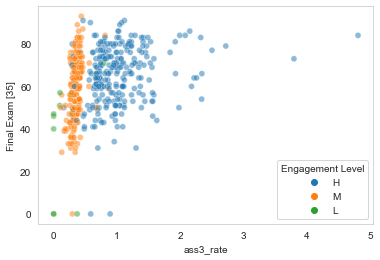

In [112]:
sns.scatterplot(data=merge_pd, x='ass3_rate', y='Final Exam [35]', hue='Engagement Level',alpha=0.5)

In [102]:
sns.scatterplot(data=merge_pd, x='Assignment 3 duration to submit (in hours)', y='Course Grade', hue='Engagement Level',alpha=0.5)

<AxesSubplot:xlabel='Assignment 3 duration to submit (in hours)', ylabel='Course Grade'>

In [126]:
sns.scatterplot(data=merge_pd, x='Assignment 3 duration to submit (in hours)', y="Final Exam [35]", hue='Engagement Level',alpha=0.5)

<AxesSubplot:xlabel='Assignment 3 duration to submit (in hours)', ylabel='Final Exam [35]'>

<AxesSubplot:xlabel='Assignment 1 duration to submit (in hours)', ylabel='Final Exam [35]'>

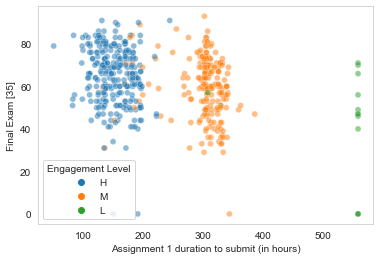

In [127]:
sns.scatterplot(data=merge_pd, x='Assignment 1 duration to submit (in hours)', y="Final Exam [35]", hue='Engagement Level',alpha=0.5)

In [128]:
sns.scatterplot(data=merge_pd, x='Assignment 2 duration to submit (in hours)', y="Final Exam [35]", hue='Engagement Level',alpha=0.5)

<AxesSubplot:xlabel='Assignment 2 duration to submit (in hours)', ylabel='Final Exam [35]'>

In [129]:
sns.scatterplot(data=merge_pd, x='Assignment 3 duration to submit (in hours)', y="Final Exam [35]", hue='Engagement Level',alpha=0.5)

<AxesSubplot:xlabel='Assignment 3 duration to submit (in hours)', ylabel='Final Exam [35]'>

C:\Users\zoli\AppData\Local\Temp\ipykernel_18148\3999005763.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


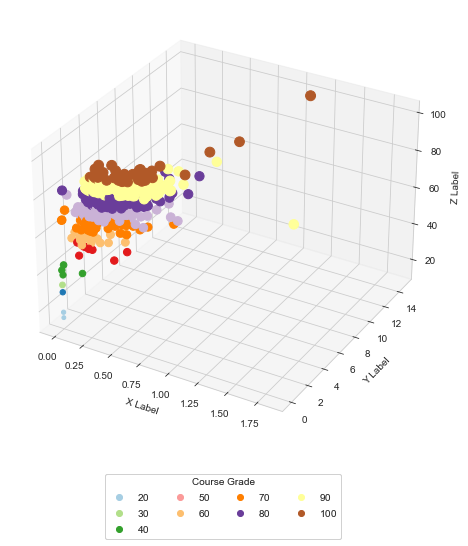

In [110]:
import seaborn as sns, numpy as np, pandas as pd, random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig)

x = merge_pd["ass1_rate"]
y = merge_pd["ass2_rate"]
z = merge_pd["Course Grade"]


g = ax.scatter(x, y, z, c=z, marker='o', depthshade=False, cmap='Paired', sizes=z)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# produce a legend with the unique colors from the scatter
legend = ax.legend(*g.legend_elements(), loc="lower center", title="Course Grade", borderaxespad=-10, ncol=4)
ax.add_artist(legend)

plt.show()

In [113]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()

In [1140]:
import plotly.express as px

fig = px.scatter_3d(x = merge_pd["ass1_rate"], y=merge_pd["ass2_rate"], z=merge_pd["Course Grade"],
              color=z)
fig.show()

In [125]:
import plotly.express as px

fig = px.scatter_3d(x = merge_pd["ass1_rate"], y=merge_pd["ass2_rate"], z=merge_pd["Final Exam [35]"],
              color=merge_pd["Engagement Level"])
fig.show()

<AxesSubplot:xlabel='Assignment01 [8]', ylabel='Course Grade'>

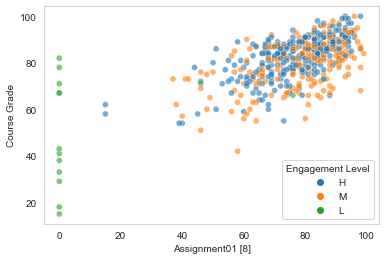

In [152]:
sns.scatterplot(data=merge_pd, x='Assignment01 [8]', y='Course Grade', hue='Engagement Level', alpha=0.6)

In [153]:
sns.scatterplot(data=merge_pd, x='Assignment02 [12]', y='Course Grade', hue='Engagement Level', alpha=0.6)

<AxesSubplot:xlabel='Assignment02 [12]', ylabel='Course Grade'>

<AxesSubplot:xlabel='Assignment03 [25]', ylabel='Course Grade'>

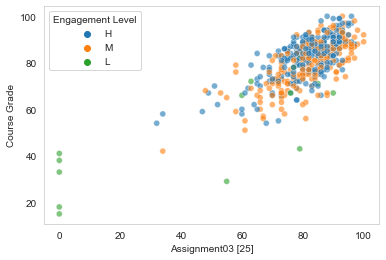

In [151]:
sns.scatterplot(data=merge_pd, x='Assignment03 [25]', y='Course Grade', hue='Engagement Level', alpha=0.6)